In [1]:
import re
import nltk

In [ ]:
text = ''
annotated_text = []

for line in lines:
    text = nltk.word_tokenize(line)
    annotated_text.append(nltk.pos_tag(text))

In [2]:
sentence = [('the', 'DT'), ('little', 'JJ'), ('yellow', 'JJ'), ('dog', 'NN'),
           ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('cat', 'NN')]

In [4]:
# Definiendo la grámatica
grammar = r"""
NP: { <DT|PRP$>?<JJ>*<NN>} # Artículo o pronombre posesivo, adjetivo o sustantivo
    {<NNP>+} # Secuencia de nombre propios
"""

In [7]:
# Analizador sintatico y checa los pares (palabra, etiqueta) y busca las que cumplen con el 'grammar'
# Después las empaqueta en un chunk y les pone el nombre que le demos
cp = nltk.RegexpParser(grammar)

In [8]:
print(cp.parse(sentence))

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


In [10]:
type(cp.parse(sentence))

nltk.tree.tree.Tree

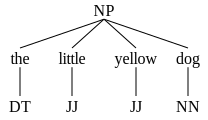

In [18]:
# El nodo raiz es 'NP', ya que es e primero
# LOs nodos hoja son todos los que ya no tienen nada abajo
(cp.parse(sentence)[0])

In [19]:
cp.parse(sentence).draw()

## Chunking con un Corpus ya etiquetado de NLTK

In [20]:
# Importando el corpus
brown = nltk.corpus.brown.tagged_sents()

In [23]:
# Haciendo la grámatica
grammar = r'CHUNK: {<V.*> <TO> <V.*>}'  # Buscar los verdos de la forma 'verb to verb'. 
                                        # Se pone V.* para tomar el verbo en cualquiera de sus formas (Tiempos)

In [24]:
# Haciendo el analizador
cp = nltk.RegexpParser(grammar)

In [25]:
# Tomando las oraciones del corpus
for sent in brown:
    # Buscando los treigramas que cumplen con la grámatica
    tree = cp.parse(sent)
    # Moviendonos en cada uno de los subarboles del arbol
    for subtree in tree.subtrees():
        # Tomando solo los tipo 'CHUNK' (Los que cumplieron las reglas gramaticales)
        if subtree.label() == 'CHUNK':
            print(subtree)

(CHUNK combined/VBN to/TO achieve/VB)
(CHUNK continue/VB to/TO place/VB)
(CHUNK serve/VB to/TO protect/VB)
(CHUNK wanted/VBD to/TO wait/VB)
(CHUNK allowed/VBN to/TO place/VB)
(CHUNK expected/VBN to/TO become/VB)
(CHUNK expected/VBN to/TO approve/VB)
(CHUNK expected/VBN to/TO make/VB)
(CHUNK intends/VBZ to/TO make/VB)
(CHUNK seek/VB to/TO set/VB)
(CHUNK like/VB to/TO see/VB)
(CHUNK designed/VBN to/TO provide/VB)
(CHUNK get/VB to/TO hear/VB)
(CHUNK expects/VBZ to/TO tell/VB)
(CHUNK expected/VBN to/TO give/VB)
(CHUNK prefer/VB to/TO pay/VB)
(CHUNK required/VBN to/TO obtain/VB)
(CHUNK permitted/VBN to/TO teach/VB)
(CHUNK designed/VBN to/TO reduce/VB)
(CHUNK Asked/VBN to/TO elaborate/VB)
(CHUNK got/VBN to/TO go/VB)
(CHUNK raised/VBN to/TO pay/VB)
(CHUNK scheduled/VBN to/TO go/VB)
(CHUNK cut/VBN to/TO meet/VB)
(CHUNK needed/VBN to/TO meet/VB)
(CHUNK hastened/VBD to/TO add/VB)
(CHUNK found/VBN to/TO prevent/VB)
(CHUNK continue/VB to/TO insist/VB)
(CHUNK compelled/VBN to/TO make/VB)
(CHUNK mad

(CHUNK like/VB to/TO hit/VB)
(CHUNK tries/VBZ to/TO answer/VB)
(CHUNK want/VB to/TO talk/VB)
(CHUNK got/VBN to/TO get/VB)
(CHUNK used/VBD to/TO follow/VB)
(CHUNK try/VB to/TO play/VB)
(CHUNK conspired/VBN to/TO lose/VB)
(CHUNK needed/VBN to/TO revive/VB)
(CHUNK chosen/VBN to/TO run/VB)
(CHUNK hopes/VBZ to/TO visit/VB)
(CHUNK got/VBD to/TO see/VB)
(CHUNK arranged/VBD to/TO sell/VB)
(CHUNK delighted/VBN to/TO get/VB)
(CHUNK want/VB to/TO enjoy/VB)
(CHUNK tried/VBN to/TO get/VB)
(CHUNK try/VB to/TO close/VB)
(CHUNK required/VBN to/TO furnish/VB)
(CHUNK obliged/VBN to/TO dole/VB)
(CHUNK wished/VBD to/TO wait/VB)
(CHUNK decided/VBD to/TO act/VB)
(CHUNK hoped/VBN to/TO attend/VB)
(CHUNK like/VB to/TO woo/VB)
(CHUNK prepared/VBN to/TO discuss/VB)
(CHUNK wanted/VBD to/TO go/VB)
(CHUNK allowed/VBN to/TO file/VB)
(CHUNK tried/VBD to/TO persuade/VB)
(CHUNK began/VBD to/TO tell/VB)
(CHUNK hoped/VBD to/TO peddle/VB)
(CHUNK intended/VBN to/TO insure/VB)
(CHUNK decided/VBD to/TO provide/VB)
(CHUNK ex

(CHUNK doing/VBG to/TO promote/VB)
(CHUNK tempted/VBN to/TO quote/VB)
(CHUNK continuing/VBG to/TO capture/VB)
(CHUNK need/VB to/TO communicate/VB)
(CHUNK like/VB to/TO see/VB)
(CHUNK interested/VBN to/TO know/VB)
(CHUNK allowed/VBN to/TO rust/VB)
(CHUNK chose/VBD to/TO devote/VB)
(CHUNK left/VBN to/TO choose/VB)
(CHUNK want/VB to/TO own/VB)
(CHUNK plan/VB to/TO become/VB)
(CHUNK persuaded/VBN to/TO restock/VB)
(CHUNK seems/VBZ to/TO improve/VB)
(CHUNK arranged/VBN to/TO permit/VB)
(CHUNK seem/VB to/TO lend/VB)
(CHUNK allowed/VBN to/TO mix/VB)
(CHUNK starts/VBZ to/TO swing/VB)
(CHUNK seems/VBZ to/TO stop/VB)
(CHUNK ordered/VBN to/TO hold/VB)
(CHUNK fitted/VBN to/TO endure/VB)
(CHUNK trying/VBG to/TO follow/VB)
(CHUNK threatening/VBG to/TO explode/VB)
(CHUNK rides/VBZ to/TO break/VB)
(CHUNK managed/VBD to/TO make/VB)
(CHUNK dancing/VBG to/TO display/VB)
(CHUNK hasten/VB to/TO report/VB)
(CHUNK seems/VBZ to/TO come/VB)
(CHUNK reassuring/VBG to/TO see/VB)
(CHUNK profess/VB to/TO know/VB)
(

(CHUNK seem/VB to/TO cascade/VB)
(CHUNK forget/VB to/TO buy/VB)
(CHUNK fail/VB to/TO shorten/VB)
(CHUNK intend/VB to/TO cook/VB)
(CHUNK sized/VBN to/TO fit/VB)
(CHUNK continue/VB to/TO release/VB)
(CHUNK wish/VB to/TO create/VB)
(CHUNK trim/VB to/TO fit/VB)
(CHUNK cut/VBN to/TO fit/VB)
(CHUNK help/VB to/TO prevent/VB)
(CHUNK designed/VBN to/TO take/VB)
(CHUNK used/VBN to/TO transport/VB)
(CHUNK want/VB to/TO buy/VB)
(CHUNK used/VBN to/TO fasten/VB)
(CHUNK help/VB to/TO keep/VB)
(CHUNK needed/VBN to/TO build/VB)
(CHUNK designed/VBN to/TO accommodate/VB)
(CHUNK adjusted/VBN to/TO suit/VB)
(CHUNK used/VBN to/TO cut/VB)
(CHUNK want/VB to/TO avoid/VB)
(CHUNK agreed/VBN to/TO take/VB)
(CHUNK planned/VBD to/TO destroy/VB)
(CHUNK allowed/VBN to/TO issue/VB)
(CHUNK managed/VBD to/TO coerce/VB)
(CHUNK want/VB to/TO know/VB)
(CHUNK planning/VBG to/TO bring/VB)
(CHUNK urged/VBN to/TO keep/VB)
(CHUNK come/VB to/TO swim/VB)
(CHUNK enjoined/VBN to/TO look/VB)
(CHUNK prepared/VBN to/TO cope/VB)
(CHUNK

(CHUNK refused/VBD to/TO touch/VB)
(CHUNK threatened/VBD to/TO shoot/VB)
(CHUNK said/VBD to/TO let/VB)
(CHUNK begin/VB to/TO roll/VB)
(CHUNK held/VBN to/TO assure/VB)
(CHUNK going/VBG to/TO make/VB)
(CHUNK managed/VBD to/TO get/VB)
(CHUNK wanted/VBD to/TO play/VB)
(CHUNK prepared/VBD to/TO counterattack/VB)
(CHUNK failed/VBN to/TO rally/VB)
(CHUNK tried/VBD to/TO rape/VB)
(CHUNK refused/VBD to/TO speak/VB)
(CHUNK called/VBN to/TO look/VB)
(CHUNK refused/VBD to/TO say/VB)
(CHUNK mean/VB to/TO suggest/VB)
(CHUNK prepared/VBN to/TO carry/VB)
(CHUNK designed/VBN to/TO overthrow/VB)
(CHUNK trying/VBG to/TO put/VB)
(CHUNK needed/VBN to/TO work/VB)
(CHUNK disposed/VBN to/TO exploit/VB)
(CHUNK fail/VB to/TO see/VB)
(CHUNK bound/VBN to/TO fall/VB)
(CHUNK tempted/VBN to/TO place/VB)
(CHUNK need/VB to/TO ask/VB)
(CHUNK seek/VB to/TO undermine/VB)
(CHUNK hand/VB to/TO show/VB)
(CHUNK begun/VBN to/TO spit/VB)
(CHUNK threatened/VBD to/TO ignite/VB)
(CHUNK invited/VBN to/TO take/VB)
(CHUNK rushing/VB

(CHUNK continues/VBZ to/TO take/VB)
(CHUNK continues/VBZ to/TO center/VB)
(CHUNK come/VBN to/TO see/VB)
(CHUNK come/VB to/TO walk/VB)
(CHUNK beginning/VBG to/TO complain/VB)
(CHUNK gather/VB to/TO sing/VB)
(CHUNK began/VBD to/TO converse/VB)
(CHUNK began/VBD to/TO relax/VB)
(CHUNK hoped/VBN to/TO become/VB)
(CHUNK forced/VBN to/TO restrict/VB)
(CHUNK began/VBD to/TO give/VB)
(CHUNK asked/VBN to/TO become/VB)
(CHUNK trying/VBG to/TO sell/VB)
(CHUNK serves/VBZ to/TO stimulate/VB)
(CHUNK seemed/VBD to/TO lack/VB)
(CHUNK offered/VBD to/TO make/VB)
(CHUNK assembled/VBN to/TO warrant/VB)
(CHUNK returned/VBD to/TO preside/VB)
(CHUNK sought/VBD to/TO prevent/VB)
(CHUNK expect/VB to/TO stand/VB)
(CHUNK compelled/VBN to/TO face/VB)
(CHUNK continue/VB to/TO live/VB)
(CHUNK refused/VBN to/TO move/VB)
(CHUNK refused/VBN to/TO obey/VB)
(CHUNK doomed/VBN to/TO become/VB)
(CHUNK tended/VBD to/TO romanticize/VB)
(CHUNK supposed/VBN to/TO keep/VB)
(CHUNK left/VBN to/TO rest/VB)
(CHUNK wants/VBZ to/TO se

(CHUNK obliged/VBN to/TO describe/VB)
(CHUNK tried/VBD to/TO block/VB)
(CHUNK chosen/VBN to/TO edit/VB)
(CHUNK plotted/VBD to/TO take/VB)
(CHUNK tried/VBD to/TO halt/VB)
(CHUNK wanted/VBD to/TO die/VB)
(CHUNK returned/VBD to/TO make/VB)
(CHUNK like/VB to/TO believe/VB)
(CHUNK bother/VB to/TO look/VB)
(CHUNK used/VBD to/TO go/VB)
(CHUNK seemed/VBD to/TO thaw/VB)
(CHUNK came/VBD to/TO give/VB)
(CHUNK wanted/VBD to/TO see/VB)
(CHUNK used/VBD to/TO look/VB)
(CHUNK meant/VBN to/TO help/VB)
(CHUNK like/VB to/TO straighten/VB)
(CHUNK hope/VB to/TO give/VB)
(CHUNK bark/VB to/TO let/VB)
(CHUNK dash/VB to/TO get/VB)
(CHUNK tried/VBD to/TO talk/VB)
(CHUNK decided/VBD to/TO leave/VB)
(CHUNK used/VBD to/TO tell/VB)
(CHUNK continue/VB to/TO reflect/VB)
(CHUNK appear/VB to/TO preach/VB)
(CHUNK intend/VB to/TO let/VB)
(CHUNK need/VB to/TO test/VB)
(CHUNK learned/VBD to/TO meet/VB)
(CHUNK said/VBN to/TO give/VB)
(CHUNK serves/VBZ to/TO reduce/VB)
(CHUNK thought/VBN to/TO provide/VB)
(CHUNK tends/VBZ to

(CHUNK began/VBD to/TO feel/VB)
(CHUNK begins/VBZ to/TO doubt/VB)
(CHUNK seemed/VBD to/TO survive/VB)
(CHUNK begins/VBZ to/TO dream/VB)
(CHUNK refuses/VBZ to/TO surrender/VB)
(CHUNK began/VBD to/TO discover/VB)
(CHUNK decided/VBN to/TO seek/VB)
(CHUNK seek/VB to/TO eliminate/VB)
(CHUNK organized/VBN to/TO deal/VB)
(CHUNK expected/VBN to/TO consist/VB)
(CHUNK beginning/VBG to/TO use/VB)
(CHUNK tried/VBN to/TO enter/VB)
(CHUNK forced/VBN to/TO play/VB)
(CHUNK want/VB to/TO quibble/VB)
(CHUNK used/VBD to/TO make/VB)
(CHUNK love/VB to/TO suffer/VB)
(CHUNK love/VB to/TO suffer/VB)
(CHUNK came/VBD to/TO believe/VB)
(CHUNK trying/VBG to/TO outdo/VB)
(CHUNK used/VBD to/TO say/VB)
(CHUNK castigates/VBZ to/TO liberate/VB)
(CHUNK helped/VBD to/TO educate/VB)
(CHUNK expect/VB to/TO find/VB)
(CHUNK supposed/VBN to/TO supplant/VB)
(CHUNK wanted/VBD to/TO write/VB)
(CHUNK asked/VBN to/TO see/VB)
(CHUNK planned/VBN to/TO lay/VB)
(CHUNK wanted/VBD to/TO put/VB)
(CHUNK decide/VB to/TO disown/VB)
(CHUNK 

(CHUNK adjusted/VBN to/TO minimize/VB)
(CHUNK required/VBN to/TO make/VB)
(CHUNK taken/VBN to/TO prevent/VB)
(CHUNK attempts/VBZ to/TO present/VB)
(CHUNK evaporate/VB to/TO leave/VB)
(CHUNK tend/VB to/TO stick/VB)
(CHUNK helps/VBZ to/TO float/VB)
(CHUNK acts/VBZ to/TO remove/VB)
(CHUNK tend/VB to/TO accelerate/VB)
(CHUNK appear/VB to/TO offer/VB)
(CHUNK allowed/VBN to/TO take/VB)
(CHUNK allowed/VBN to/TO distil/VB)
(CHUNK undertaken/VBN to/TO see/VB)
(CHUNK allowed/VBN to/TO stand/VB)
(CHUNK thought/VBN to/TO contribute/VB)
(CHUNK made/VBN to/TO characterize/VB)
(CHUNK expect/VB to/TO find/VB)
(CHUNK known/VBN to/TO cause/VB)
(CHUNK allowed/VBN to/TO stand/VB)
(CHUNK allowed/VBN to/TO stand/VB)
(CHUNK used/VBN to/TO test/VB)
(CHUNK allowed/VBN to/TO clot/VB)
(CHUNK need/VB to/TO make/VB)
(CHUNK try/VB to/TO key/VB)
(CHUNK manage/VB to/TO keep/VB)
(CHUNK seem/VB to/TO prefer/VB)
(CHUNK continues/VBZ to/TO add/VB)
(CHUNK begin/VB to/TO play/VB)
(CHUNK begin/VB to/TO appear/VB)
(CHUNK beg

(CHUNK want/VB to/TO explore/VB)
(CHUNK struggling/VBG to/TO meet/VB)
(CHUNK trying/VBG to/TO learn/VB)
(CHUNK continues/VBZ to/TO increase/VB)
(CHUNK like/VB to/TO tease/VB)
(CHUNK begins/VBZ to/TO decline/VB)
(CHUNK begins/VBZ to/TO substitute/VB)
(CHUNK learned/VBN to/TO cooperate/VB)
(CHUNK begins/VBZ to/TO participate/VB)
(CHUNK helping/VBG to/TO make/VB)
(CHUNK failing/VBG to/TO achieve/VB)
(CHUNK trying/VBG to/TO say/VB)
(CHUNK learn/VB to/TO identify/VB)
(CHUNK failing/VBG to/TO make/VB)
(CHUNK needs/VBZ to/TO know/VB)
(CHUNK fails/VBZ to/TO meet/VB)
(CHUNK expected/VBN to/TO administer/VB)
(CHUNK used/VBN to/TO store/VB)
(CHUNK permitted/VBN to/TO see/VB)
(CHUNK expected/VBN to/TO study/VB)
(CHUNK wish/VB to/TO note/VB)
(CHUNK required/VBN to/TO furnish/VB)
(CHUNK want/VB to/TO provide/VB)
(CHUNK attempt/VB to/TO represent/VB)
(CHUNK hopes/VBZ to/TO encourage/VB)
(CHUNK designed/VBN to/TO help/VB)
(CHUNK appointed/VBN to/TO act/VB)
(CHUNK expected/VBN to/TO vote/VB)
(CHUNK app

(CHUNK served/VBN to/TO overheat/VB)
(CHUNK seemed/VBD to/TO crouch/VB)
(CHUNK seemed/VBD to/TO advance/VB)
(CHUNK seemed/VBD to/TO resist/VB)
(CHUNK began/VBD to/TO write/VB)
(CHUNK refuse/VB to/TO mention/VB)
(CHUNK needed/VBD to/TO eat/VB)
(CHUNK wanting/VBG to/TO know/VB)
(CHUNK stop/VB to/TO grasp/VB)
(CHUNK dared/VBN to/TO defy/VB)
(CHUNK hoping/VBG to/TO store/VB)
(CHUNK going/VBG to/TO get/VB)
(CHUNK want/VB to/TO get/VB)
(CHUNK trying/VBG to/TO talk/VB)
(CHUNK determined/VBD to/TO go/VB)
(CHUNK proposed/VBN to/TO rebuild/VB)
(CHUNK going/VBG to/TO stay/VB)
(CHUNK plan/VB to/TO repair/VB)
(CHUNK Hope/VB to/TO see/VB)
(CHUNK used/VBD to/TO take/VB)
(CHUNK want/VB to/TO kill/VB)
(CHUNK intend/VB to/TO go/VB)
(CHUNK wanted/VBN to/TO hurt/VB)
(CHUNK bother/VB to/TO think/VB)
(CHUNK delighted/VBN to/TO see/VB)
(CHUNK began/VBD to/TO weep/VB)
(CHUNK began/VBD to/TO move/VB)
(CHUNK tried/VBD to/TO push/VB)
(CHUNK tried/VBD to/TO rescue/VB)
(CHUNK seemed/VBD to/TO hold/VB)
(CHUNK began

(CHUNK Forgot/VBD to/TO get/VB)
(CHUNK started/VBD to/TO say/VB)
(CHUNK trying/VBG to/TO make/VB)
(CHUNK want/VB to/TO sit/VB)
(CHUNK trying/VBG to/TO get/VB)
(CHUNK want/VB to/TO lease/VB)
(CHUNK wanted/VBD to/TO shadow/VB)
(CHUNK trying/VBG to/TO make/VB)
(CHUNK tried/VBN to/TO shadow/VB)
(CHUNK going/VBG to/TO join/VB)
(CHUNK try/VB to/TO keep/VB)
(CHUNK like/VB to/TO run/VB)
(CHUNK wanted/VBD to/TO case/VB)
(CHUNK going/VBG to/TO join/VB)
(CHUNK wanted/VBD to/TO hang/VB)
(CHUNK go/VB to/TO pick/VB)
(CHUNK began/VBD to/TO back/VB)
(CHUNK paused/VBD to/TO feel/VB)
(CHUNK decided/VBD to/TO risk/VB)
(CHUNK turned/VBD to/TO face/VB)
(CHUNK began/VBD to/TO feel/VB)
(CHUNK started/VBD to/TO sweep/VB)
(CHUNK startled/VBN to/TO find/VB)
(CHUNK meant/VBN to/TO convey/VB)
(CHUNK going/VBG to/TO leave/VB)
(CHUNK returning/VBG to/TO seek/VB)
(CHUNK bother/VB to/TO look/VB)
(CHUNK try/VB to/TO run/VB)
(CHUNK going/VBG to/TO make/VB)
(CHUNK began/VBD to/TO wave/VB)
(CHUNK gone/VBN to/TO get/VB)
(

(CHUNK help/VB to/TO repel/VB)
(CHUNK seems/VBZ to/TO shield/VB)
(CHUNK pretending/VBG to/TO sleep/VB)
(CHUNK threatening/VBG to/TO report/VB)
(CHUNK seem/VB to/TO concentrate/VB)
(CHUNK want/VB to/TO give/VB)
(CHUNK trying/VBG to/TO pull/VB)
(CHUNK adjusted/VBN to/TO operate/VB)
(CHUNK like/VB to/TO see/VB)
(CHUNK bent/VBD to/TO observe/VB)
(CHUNK forced/VBN to/TO accompany/VB)
(CHUNK fear/VB to/TO tread/VB)
(CHUNK programed/VBN to/TO compute/VB)
(CHUNK remember/VB to/TO program/VB)
(CHUNK directed/VBN to/TO develop/VB)
(CHUNK schooled/VBN to/TO examine/VB)
(CHUNK appeared/VBD to/TO require/VB)
(CHUNK encouraged/VBN to/TO develop/VB)
(CHUNK remembered/VBN to/TO introduce/VB)
(CHUNK guided/VBN to/TO make/VB)
(CHUNK tried/VBD to/TO run/VB)
(CHUNK tried/VBD to/TO tell/VB)
(CHUNK tried/VBD to/TO ask/VB)
(CHUNK want/VB to/TO ask/VB)
(CHUNK going/VBG to/TO come/VB)
(CHUNK going/VBG to/TO happen/VB)
(CHUNK going/VBG to/TO happen/VB)
(CHUNK going/VBG to/TO take/VB)
(CHUNK inclined/VBN to/TO t

(CHUNK like/VB to/TO keep/VB)
(CHUNK seem/VB to/TO snap/VB)
(CHUNK like/VB to/TO think/VB)
(CHUNK beginning/VBG to/TO find/VB)
(CHUNK beginning/VBG to/TO look/VB)
(CHUNK going/VBG to/TO last/VB)
(CHUNK going/VBG to/TO prove/VB)
(CHUNK hoped/VBD to/TO die/VB)
(CHUNK gone/VBN to/TO live/VB)
(CHUNK stayed/VBD to/TO get/VB)
(CHUNK turned/VBD to/TO go/VB)
(CHUNK going/VBG to/TO see/VB)
(CHUNK going/VBG to/TO laugh/VB)
(CHUNK tried/VBD to/TO bite/VB)
(CHUNK seem/VB to/TO rise/VB)
(CHUNK come/VBN to/TO see/VB)
(CHUNK got/VBN to/TO know/VB)
(CHUNK seem/VB to/TO take/VB)
(CHUNK beginning/VBG to/TO creep/VB)
(CHUNK seemed/VBN to/TO rain/VB)
(CHUNK like/VB to/TO hear/VB)
(CHUNK come/VBN to/TO make/VB)
(CHUNK started/VBD to/TO move/VB)
(CHUNK bent/VBD to/TO pick/VB)
(CHUNK permitted/VBN to/TO operate/VB)
(CHUNK beginning/VBG to/TO get/VB)
(CHUNK seemed/VBD to/TO think/VB)
(CHUNK tried/VBD to/TO make/VB)
(CHUNK wanted/VBD to/TO present/VB)
(CHUNK expected/VBN to/TO stay/VB)
(CHUNK wish/VB to/TO sta

(CHUNK got/VBN to/TO run/VB)
(CHUNK waiting/VBG to/TO get/VB)
(CHUNK need/VB to/TO worry/VB)
(CHUNK seems/VBZ to/TO think/VB)
(CHUNK tries/VBZ to/TO baffle/VB)
(CHUNK mean/VB to/TO reconsider/VB)
(CHUNK refused/VBD to/TO make/VB)
(CHUNK seems/VBZ to/TO make/VB)
(CHUNK seems/VBZ to/TO refer/VB)
(CHUNK seems/VBZ to/TO say/VB)
(CHUNK delighted/VBN to/TO meet/VB)
(CHUNK like/VB to/TO know/VB)
(CHUNK regret/VB to/TO say/VB)
(CHUNK seems/VBZ to/TO refer/VB)
(CHUNK come/VBN to/TO talk/VB)
(CHUNK seem/VB to/TO remember/VB)
(CHUNK want/VB to/TO hear/VB)
(CHUNK trying/VBG to/TO get/VB)
(CHUNK forgot/VBD to/TO say/VB)
(CHUNK seemed/VBD to/TO believe/VB)
(CHUNK wanted/VBN to/TO get/VB)
(CHUNK wanted/VBD to/TO see/VB)
(CHUNK wanted/VBD to/TO touch/VB)
(CHUNK got/VBN to/TO entertain/VB)
(CHUNK tried/VBD to/TO keep/VB)
(CHUNK going/VBG to/TO tell/VB)
(CHUNK thought/VBN to/TO mix/VB)
(CHUNK going/VBG to/TO jump/VB)
(CHUNK beginning/VBG to/TO catch/VB)
(CHUNK try/VB to/TO see/VB)
(CHUNK phoned/VBD to/T

### Buscando algunos bigramas y trigramas interesantes en el Corpus

In [26]:
grammar = r"""
NV:   {<NN.*><V.*>}       # Bigrama de la forma 'Noun Verb' (Los dos en cualquier forma) Ex. 'Global Warming'
NN:   {<NN.*><NN.*>}      # Bigrama de la forma 'Noun Noun' ( Los dos en cualquier forma) Ex. 'Data Science'
TRI:  {<NN.*><IN><NN.*>}  # Trigrama de la forma 'Noun Preposition Noun' (Los tres en cualquier forma) Ex. ''
"""

In [27]:
cp = nltk.RegexpParser(grammar)

In [28]:
# Tomando las oraciones del corpus
for sent in brown:
    # Buscando los n-gramas que cumplen con la grámatica
    tree = cp.parse(sent)
    # Moviendonos en cada uno de los subarboles del arbol
    for subtree in tree.subtrees():
        # Tomando solo los tipo 'CHUNK' (Los que cumplieron las reglas gramaticales)
        if subtree.label() in ['NV', 'NN', 'TRI']:
            print(subtree)

(NV Jury/NN-TL said/VBD)
(NV election/NN produced/VBD)
(NV irregularities/NNS took/VBD)
(NN term-end/NN presentments/NNS)
(NN term/NN jury/NN)
(NN Court/NN-TL Judge/NN-TL)
(NV jury/NN said/VBD)
(TRI number/NN of/IN voters/NNS)
(NV jury/NN said/VBD)
(NN election/NN laws/NNS)
(NV legislators/NNS act/VB)
(NV laws/NNS studied/VBN)
(NV jury/NN commented/VBD)
(NV County/NN-TL purchasing/VBG)
(NV Merger/NN-HL proposed/VBN-HL)
(NV jury/NN said/VBD)
(TRI cost/NN of/IN administration/NN)
(NV City/NN-TL Purchasing/VBG-TL)
(NV jury/NN said/VBD)
(TRI result/NN of/IN (NN city/NN personnel/NNS))
(NN city/NN personnel/NNS)
(NN automobile/NN title/NN)
(NV jury/NN took/VBD)
(NN State/NN-TL Welfare/NN-TL)
(NN Department's/NN$-TL handling/NN)
(NV funds/NNS granted/VBN)
(NN child/NN welfare/NN)
(NN assistance/NN program/NN)
(NV jury/NN said/VBD)
(NN State/NN-TL Welfare/NN-TL)
(NN welfare/NN departments/NNS)
(NV jurors/NNS said/VBD)
(NV jurors/NNS said/VBD)
(NN ordinary's/NN$ court/NN)
(TRI appointment/NN o

(NV movement/NN started/VBD)
(NV leadership/NN speaking/VBG)
(TRI (NN rule/NN charter/NN) in/IN favor/NN)
(NN rule/NN charter/NN)
(NN league/NN charter/NN)
(NN rule/NN charter/NN)
(NN Citizens/NNS-TL Group/NN-TL)
(NV signers/NNS affixed/VBN)
(NN tax/NN increase/NN)
(NV town/NN take/VB)
(NN District/NN-TL sewer/NN)
(NV ordinance/NN permitting/VBG)
(NN minor/NN traffic/NN)
(NN police/NN station/NN)
(NN Town/NN-TL Council/NN-TL)
(NN Council/NN president/NN)
(NN Town/NN-TL Solicitor/NN-TL)
(TRI (NN District/NN-TL Court/NN-TL) for/IN disposition/NN)
(NN District/NN-TL Court/NN-TL)
(NV costs/NNS involved/VBN)
(NV night/NN disagreed/VBD)
(NN campaign/NN issue/NN)
(NV candidates/NNS spoke/VBD)
(NN Park/NN-TL Hotel/NN-TL)
(NN Club/NN-TL cocktail/NN)
(NN Plains/NNS-TL Country/NN-TL)
(TRI chorus/NN of/IN boos/NNS)
(NN State/NN-TL Federation/NN-TL)
(NN Women's/NNS$-TL Clubs/NNS-TL)
(NV heart/NN stopped/VBD)
(NV lifeblood/NN congealed/VBD)
(NN fall/NN campaign/NN)
(NV decency/NN charge/VB)
(NV labo

(NV members/NNS indicated/VBD)
(NN advisory/NN poll/NN)
(NN $581,000/NNS bond/NN)
(NV dinner/NN honoring/VBG)
(NN joint/NN press/NN)
(NN executive/NN secretary/NN)
(NV dinner/NN include/VB)
(NN Labor/NN-TL Commissioner/NN-TL)
(NN Oak/NN-TL-HL Grove/NN-TL-HL)
(NN Oak/NN-TL Lodge/NN-TL)
(NN Water/NN-TL district/NN)
(TRI board/NN of/IN directors/NNS)
(NN water/NN office/NN)
(NN re-election/NN bid/NN)
(NV candidates/NNS seek/VB)
(NV place/NN vacated/VBN)
(NV council/NN revised/VBD)
(NV beliefs/NNS adopted/VBN)
(NV council/NN agreed/VBD)
(TRI bulwark/NN for/IN fundamentalism/NN)
(NV point/NN-HL added/VBN-HL)
(NV changes/NNS involved/VBD)
(NV belief/NN stood/VBD)
(NV point/NN added/VBN)
(TRI rule/NN of/IN faith/NN)
(NN Virgin/NN-TL birth/NN)
(TRI superintendent/NN of/IN Assemblies/NNS-TL)
(NV Election/NN came/VBD)
(NV delegates/NNS heard/VBD)
(NN expansion/NN program/NN)
(NN missions/NNS department/NN)
(NN years'/NNS$ work/NN)
(NV Surveys/NNS show/VB)
(NV Church/NN-HL loses/VBZ-HL)
(NN popul

(NV lefthander/NN going/VBG)
(NV Pirates/NNS-TL needed/VBD)
(NV bats/NNS quieted/VBD)
(NV men/NNS hitting/VBG)
(TRI list/NN of/IN averages/NNS)
(NV Pirates/NNS-TL dragging/VBG)
(NN home/NN runs/NNS)
(NV Pirates/NNS-TL jumped/VBD)
(NV Cardinals/NNS-TL stood/VBD)
(NN club's/NN$ top/NN)
(NV Birds/NNS-TL tumbled/VBD)
(NN League/NN-TL club/NN)
(NV dinner/NN dealt/VBD)
(NN University/NN-TL players/NNS)
(TRI words/NNS of/IN Coach/NN-TL)
(NN player/NN award/NN)
(NN knee/NN injury/NN)
(NV people/NNS talk/VB)
(NN team/NN spirit/NN)
(TRI sort/NN of/IN thing/NN)
(NV players/NNS pepping/VBG)
(NN fight/NN talk/NN)
(NN sports/NNS editor/NN)
(NN basketball/NN skills/NNS)
(NV coach/NN listed/VBD)
(NN boy's/NN$ faults/NNS)
(NN silver/NN bowl/NN)
(NN coach's/NN$ wife/NN)
(NN sports/NNS editor/NN)
(NV knee/NN healed/VBD)
(NV bench/NN doing/VBG)
(NV clock/NN given/VBN)
(NN Invitation/NN-TL Tournament/NN-TL)
(NV team/NN set/VBD)
(NN court/NN advantage/NN)
(NV University/NN-TL found/VBD)
(NN baseball/NN game

(TRI (NN university's/NN$ degree/NN) in/IN law/NN)
(NN university's/NN$ degree/NN)
(NV cent/NN compared/VBN)
(TRI engineering/NN at/IN $9,841,000/NNS)
(TRI total/NN of/IN (NN construction/NN contracts/NNS))
(NN construction/NN contracts/NNS)
(NV increase/NN compared/VBN)
(NV total/NN showed/VBD)
(TRI engineering/NN at/IN $102,285,000/NNS)
(NV building/NN consists/VBZ)
(NV buildings/NNS designed/VBN)
(NV market/NN enjoyed/VBN)
(TRI span/NN of/IN time/NN)
(NN unit/NN dwellings/NNS)
(TRI availability/NN of/IN (NN mortgage/NN money/NN))
(NN mortgage/NN money/NN)
(NN apartment/NN construction/NN)
(TRI level/NN of/IN prosperity/NN)
(NN consumer/NN income/NN)
(NV circumstances/NNS vary/VB)
(NN vice/NN president/NN)
(NV hardware/NN manufacturing/VBG)
(NV seekers/NNS seem/VB)
(NV problems/NNS involved/VBN)
(NV Convenience/NN-HL held/VBN-HL)
(NN quality/NN components/NNS)
(NN Harbor/NN-TL View/NN-TL)
(NN Cherry/NN-TL Hill/NN-TL)
(NN terrace/NN type/NN)
(NN ground/NN floor/NN)
(TRI flight/NN of/I

(NV programs/NNS conducted/VBN)
(NN fire/NN ant/NN)
(NN sugar/NN cane/NN)
(NV leader/NN said/VBD)
(NN Forest/NN-TL Service/NN-TL)
(NV officials/NNS pride/VB)
(NV experiments/NNS reaches/VBZ)
(TRI enemies/NNS of/IN insects/NNS)
(NN Wilderness/NN-TL bill/NN)
(NN seashore/NN parks/NNS)
(NV birds/NNS breed/VB)
(NN pesticides/NNS co-ordination/NN)
(NN water/NN pollution/NN)
(NN control/NN programs/NNS)
(TRI sea/NN by/IN oil/NN)
(NN Life/NN-TL Sanctuary/NN-TL)
(NN Conservation/NN-TL League/NN-TL)
(NN tidelands/NNS tract/NN)
(NV cockpit/NN installed/VBN)
(NN V-1/NN rocket-bomb/NN)
(NN World/NN-TL War/NN-TL)
(NV bomber/NN rolled/VBD)
(NN pulse/NN jet/NN)
(NN Space/NN-TL Division/NN-TL)
(NN key/NN role/NN)
(NN V-1/NN rocket-bombs/NNS)
(NV project/NN depended/VBD)
(NN guidance/NN mechanism/NN)
(NV scientist/NN waited/VBD)
(NV bomber/NN gained/VBD)
(NN pulse-jet/NN engine/NN)
(NV rocket/NN became/VBD)
(NN power/NN control/NN)
(NN fuel/NN flow/NN)
(NN test/NN strip/NN)
(NN rocket's/NN$ tail/NN)
(N

(TRI director/NN of/IN (NN SMU's/NN food/NN))
(NN SMU's/NN food/NN)
(NN SMU's/NN food/NN)
(NN woman's/NN$ burden/NN)
(NN Student/NN-TL Center/NN-TL)
(NN Dining/NN-TL Hall/NN-TL)
(NN athlete's/NN$ tables/NNS)
(NN School/NN-TL meals/NNS)
(NV effort/NN spice/VB)
(NN chow/NN line/NN)
(NN SMU/NN football/NN)
(NN athletes'/NNS$ stomachs/NNS)
(NV girls/NNS like/VB)
(NN food/NN expert/NN)
(TRI demand/NN for/IN broccoli/NN)
(NN saffron/NN robes/NNS)
(NN cafeteria/NN line/NN)
(NN chicken/NN breast/NN)
(TRI side/NN by/IN side/NN)
(TRI taste/NN with/IN (NN onion/NN juice/NN))
(NN onion/NN juice/NN)
(NN chicken/NN breasts/NNS)
(NN one-half/NN hour/NN)
(TRI top/NN of/IN (NN chicken/NN breasts/NNS))
(NN chicken/NN breasts/NNS)
(NN design/NN facets/NNS)
(NV manufacturers/NNS chose/VBD)
(NN Heritage/NN-TL collection/NN)
(TRI types/NNS of/IN woods/NNS)
(TRI varieties/NNS of/IN burl/NN)
(TRI feeling/NN of/IN texture/NN)
(NN custom-design/NN look/NN)
(TRI simplicity/NN with/IN warmth/NN)
(NV posts/NNS giv

(TRI pilgrimage/NN to/IN Mount/NN-TL)
(NV evening/NN tired/VBN)
(TRI frame/NN of/IN mind/NN)
(NV time/NN chatting/VBG)
(TRI lack/NN of/IN interest/NN)
(NV turn/NN told/VBD)
(TRI plan/NN in/IN mind/NN)
(NV judge/NN listened/VBD)
(NV woman/NN poured/VBD)
(TRI aid/NN from/IN (NN Family/NN-TL Service/NN-TL))
(NN Family/NN-TL Service/NN-TL)
(NN Family/NN-TL Service/NN-TL)
(NN community/NN case/NN)
(NN work/NN service/NN)
(TRI variety/NN of/IN (NN family/NN problems/NNS))
(NN family/NN problems/NNS)
(TRI series/NN of/IN interviews/NNS)
(NN Family/NN-TL Service/NN-TL)
(TRI possibility/NN of/IN divorce/NN)
(NV problems/NNS confronting/VBG)
(TRI outlook/NN on/IN life/NN)
(NV husband/NN comes/VBZ)
(NN children's/NNS$ bed-time/NN)
(NN family/NN rough-housing/NN)
(NN Family/NN-TL Service/NN-TL)
(TRI hundreds/NNS of/IN families/NNS)
(NN Family/NN-TL Service/NN-TL)
(NN Givers/NNS-TL Fund/NN-TL)
(NV Drive/NN-TL failed/VBD)
(NV rangers/NNS said/VBD)
(NV trip/NN got/VBD)
(NN fall/NN colors/NNS)
(NV ski

(NV test/NN came/VBD)
(NN tee/NN shot/NN)
(NV woods/NNS separating/VBG)
(NV ball/NN came/VBD)
(TRI bunker/NN in/IN front/NN)
(TRI man/NN of/IN muscle/NN)
(NN home/NN run/NN)
(NV feat/NN touches/VBZ)
(NN home/NN runs/NNS)
(NV performance/NN merits/VBZ)
(TRI (NN fly/NN balls/NNS) in/IN (NN center/NN field/NN))
(NN fly/NN balls/NNS)
(NN center/NN field/NN)
(NV teammate/NN explained/VBD)
(NV team/NN thought/VBD)
(NN home/NN runs/NNS)
(NV achievement/NN borders/VBZ)
(NN year/NN home/NN)
(NV runs/NNS ranged/VBD)
(NV Orioles/NNS-TL ambled/VBD)
(NV bases/NNS loaded/VBN)
(NN grand-slam/NN home/NN)
(NV Giants/NNS-TL borrowed/VBD)
(NN teammate's/NN$ bat/NN)
(NN home/NN runs/NNS)
(NV Braves/NNS-TL tied/VBD)
(NN major-league/NN record/NN)
(NN home/NN runs/NNS)
(TRI record/NN with/IN (NN home/NN runs/NNS))
(NN home/NN runs/NNS)
(TRI times/NNS at/IN bat/NN)
(NV Pitchers/NNS grumble/VB)
(NN strike/NN zone/NN)
(NV Experts/NNS point/VB)
(NV League/NN-TL caused/VBD)
(NV season/NN produced/VBD)
(TRI burea

(TRI balance/NN of/IN payments/NNS)
(NV firms/NNS coming/VBG)
(NN textile/NN market/NN)
(NN textile/NN plans/NNS)
(NN textile/NN industry/NN)
(NV trouble/NN exporting/VBG)
(NV countries/NNS earn/VB)
(NN low-wage/NN countries/NNS)
(NN textile/NN exports/NNS)
(TRI exports/NNS of/IN textiles/NNS)
(TRI types/NNS of/IN textiles/NNS)
(NV textiles/NNS pour/VB)
(NV practices/NNS cause/VB)
(NN import/NN quotas/NNS)
(NN world's/NN$ textile/NN)
(NN stabilization/NN agreements/NNS)
(NV plan/NN looks/VBZ)
(NN textile/NN industry/NN)
(NN textile/NN industry/NN)
(NN textile/NN machinery/NN)
(NN Government/NN research/NN)
(NN Import/NN quotas/NNS)
(NN import/NN quotas/NNS)
(NN Government's/NN$-TL success/NN)
(NN textile/NN industry/NN)
(NV difficulty/NN competing/VBG)
(TRI imports/NNS from/IN (NN low-wage/NN countries/NNS))
(NN low-wage/NN countries/NNS)
(NN coal/NN miners/NNS)
(NV mouths/NNS water/VB)
(NN Steel/NN-TL Company/NN-TL)
(TRI coal/NN in/IN order/NN)
(NV coal/NN delivered/VBN)
(TRI mechaniz

(NN coalition/NN government/NN)
(NV fact/NN emerging/VBG)
(NV Party/NN-TL slipped/VBD)
(NN nation's/NN$ strength/NN)
(NV allies/NNS consider/VB)
(NN Soviet/NN-TL Union/NN-TL)
(NN Communist/NN-TL bloc/NN)
(NV question/NN left/VBN)
(TRI points/NNS of/IN view/NN)
(TRI nation/NN of/IN joiners/NNS)
(NV friends/NNS find/VB)
(NN Tribune/NN-TL News/NN-TL)
(NN State/NN-TL Atty./NN-TL)
(TRI series/NN of/IN questions/NNS)
(NV organization/NN seeking/VBG)
(TRI churches/NNS with/IN (NN blanket/NN accusations/NNS))
(NN blanket/NN accusations/NNS)
(TRI statesmen/NNS for/IN wars/NNS)
(NN pressure/NN tactics/NNS)
(NN telephone/NN calls/NNS)
(NN letter/NN writing/NN)
(NV spokesmen/NNS seem/VB)
(NN organization/NN show/NN)
(TRI personality/NN in/IN opposition/NN)
(NV joiner/NN asks/VBZ)
(NN sand/NN fleas/NNS)
(NN tip/NN end/NN)
(NV public/NN losing/VBG)
(TRI developers/NNS of/IN (NN waterfront/NN land/NN))
(NN waterfront/NN land/NN)
(TRI row/NN of/IN hotels/NNS)
(NN city/NN-HL hall/NN-HL)
(NN City/NN-TL 

(NV game/NN called/VBN)
(NV driver/NN cruising/VBG)
(TRI m.p.h./NNS in/IN Lane/NN-TL)
(NV freeway/NN spies/VBZ)
(NN traffic/NN jam/NN)
(NV lane/NN appears/VBZ)
(TRI fender/NN into/IN Lane/NN-TL)
(TRI driver/NN in/IN Lane/NN-TL)
(NV driver/NN guessing/VBG)
(NV driver/NN cut/VBN)
(NN gas/NN pedal/NN)
(TRI (NN negative/NN explanation/NN) of/IN courtesy/NN)
(NN negative/NN explanation/NN)
(TRI months/NNS of/IN research/NN)
(NN dozen/NN occasions/NNS)
(NV drivers/NNS stopped/VBD)
(TRI lane/NN of/IN traffic/NN)
(NN side/NN street/NN)
(NV writer/NN came/VBD)
(NN ball/NN club/NN)
(NV managers/NNS go/VB)
(NN rookie/NN pitcher/NN)
(NV Birds/NNS-TL opened/VBD)
(NN spring/NN training/NN)
(TRI lot/NN of/IN jobs/NNS)
(NV rookies/NNS nailed/VBD)
(NN spring/NN training/NN)
(NV ball/NN going/VBG)
(NV trouble/NN doing/VBG)
(TRI combination/NN of/IN youth/NN)
(NN home/NN runs/NNS)
(NN line/NN catching/NN)
(NN League/NN-TL pennant/NN)
(NN League/NN-TL club/NN)
(NV things/NNS look/VB)
(TRI child/NN at/IN f

(NN canvas/NN pants/NNS)
(TRI agony/NN of/IN (NN goal-line/NN stands/NNS))
(NN goal-line/NN stands/NNS)
(NV man/NN goes/VBZ)
(TRI cities/NNS with/IN populations/NNS)
(TRI balance/NN of/IN power/NN)
(NV research/NN broke/VBD)
(NN minority/NN groups/NNS)
(NV breakdown/NN discovered/VBD)
(NN task/NN-HL force/NN-HL)
(NN task/NN force/NN)
(TRI (NN minority/NN groups/NNS) in/IN cities/NNS)
(NN minority/NN groups/NNS)
(NN task/NN force/NN)
(NN party/NN harm/NN)
(TRI persons/NNS without/IN jobs/NNS)
(TRI towns/NNS by/IN Secretary/NN-TL)
(NV GOP/NN declared/VBD)
(NV people/NNS visited/VBN)
(TRI government/NN with/IN heart/NN)
(TRI distortion/NN of/IN President/NN-TL)
(TRI denunciation/NN of/IN President/NN-TL)
(TRI case/NN in/IN point/NN)
(NN Security/NN-TL program/NN)
(TRI barrier/NN to/IN (NN GOP/NN hopes/NNS))
(NN GOP/NN hopes/NNS)
(NV Errors/NNS-HL repeated/VBN-HL)
(NN party/NN leadership/NN)
(NN party's/NN$ failure/NN)
(NV beings/NNS caught/VBN)
(NN partisan/NN leadership/NN)
(TRI consider

(TRI expression/NN of/IN appreciation/NN)
(NV mandate/NN given/VBN)
(NN world/NN organization/NN)
(NN Soviet/NN-TL Union/NN-TL)
(NV flowers/NNS withheld/VBN)
(TRI note/NN of/IN appreciation/NN)
(NN camel/NN driver/NN)
(TRI people/NNS to/IN people/NNS)
(NN Expressway/NN-HL answer/NN-HL)
(NN River/NN-TL-HL Drive/NN-TL-HL)
(NV considerations/NNS deserve/VB)
(NV problems/NNS associated/VBN)
(NV expressway/NN stems/VBZ)
(TRI methods/NNS of/IN (NN river/NN crossings/NNS))
(NN river/NN crossings/NNS)
(NN congestion/NN points/NNS)
(NV cars/NNS starting/VBG)
(NN River/NN-TL Drive/NN-TL)
(NN drainage/NN problems/NNS)
(NN lane/NN stripes/NNS)
(NN traffic/NN burden/NN)
(NV traffic/NN carrying/VBG)
(NN River/NN-TL Drive/NN-TL)
(NV expenditures/NNS necessitated/VBN)
(NN River/NN-TL Drive/NN-TL)
(NV Square/NN-TL seems/VBZ)
(NV soldiers/NNS fought/VBD)
(NN Park/NN-TL Commission/NN-TL)
(NV doubt/NN approve/VB)
(TRI road/NN to/IN Totalitarianism/NN-TL)
(NV Square/NN-TL saying/VBG)
(TRI Feeding/NN of/IN 

(TRI public/NN at/IN bay/NN)
(TRI tyranny/NN of/IN lust/NN)
(TRI point/NN of/IN ugliness/NN)
(NN Soviet/NN-TL Communist/NN-TL)
(NN party's/NN$ Draft/NN-TL)
(TRI transition/NN to/IN communism/NN)
(TRI sort/NN of/IN apotheosis/NN)
(TRI consecration/NN of/IN ideas/NNS)
(NN party/NN journals/NNS)
(NN Communist/NN-TL society/NN)
(NN Draft/NN-TL Program/NN-TL)
(NN Soviet/NN-TL leaders/NNS)
(NN People's/NNS$-TL State/NN-TL)
(TRI plan/NN for/IN rotation/NN)
(NV leaders/NNS promised/VBD)
(TRI candidates/NNS for/IN voters/NNS)
(NN Draft/NN-TL Program/NN-TL)
(NN party's/NN$ intention/NN)
(NN state/NN farms/NNS)
(NN Soviet/NN-TL peasant/NN)
(NV produce/NN grown/VBN)
(NN party's/NN$ claim/NN)
(NN state/NN farm/NN)
(NN Draft/NN-TL Program/NN-TL)
(NN sickness/NN benefits/NNS)
(NN old-age/NN pensions/NNS)
(NN welfare/NN state/NN)
(NN Soviet/NN-TL Union/NN-TL)
(TRI respect/NN of/IN food/NN)
(NV agriculture/NN progress/VB)
(NV surprises/NNS provided/VBN)
(TRI kinds/NNS of/IN sins/NNS)
(NN welfare/NN sta

(TRI production/NN of/IN words/NNS)
(NV Lines/NNS came/VBD)
(NN piano/NN accompaniments/NNS)
(NV soprano/NN named/VBN)
(NN solo/NN motet/NN)
(NV soloists/NNS included/VBD)
(NV group/NN included/VBD)
(NN folk/NN songs/NNS)
(NN cowboy/NN costume/NN)
(NV combination/NN proved/VBD)
(NV company/NN called/VBN)
(NN City/NN-TL Center/NN-TL)
(NV curtain/NN falls/VBZ)
(TRI dance/NN by/IN dance/NN)
(TRI title/NN by/IN title/NN)
(TRI kind/NN of/IN (NN nonstop/NN format/NN))
(NN nonstop/NN format/NN)
(TRI pauses/NNS for/IN identification/NN)
(NN folk/NN origin/NN)
(NV husband/NN founded/VBD)
(TRI presentation/NN to/IN spectators/NNS)
(TRI range/NN of/IN (NN folk/NN movements/NNS))
(NN folk/NN movements/NNS)
(NN ballet/NN training/NN)
(NV mazurka/NN choreographed/VBN)
(TRI touches/NNS of/IN humor/NN)
(TRI band/NN of/IN musicians/NNS)
(NN season's/NN$ opener/NN)
(NV audience/NN liked/VBD)
(NN strip/NN cartoonist/NN)
(NN idea/NN material/NN)
(NV troubles/NNS begin/VB)
(NN fledgling/NN artist/NN)
(NN h

(NN slave/NN auctioneer's/NN$)
(NN field-hands'/NNS$ work/NN)
(NN jazz/NN programs/NNS)
(NN Man/NN-TL River/NN-TL)
(NN year's/NN$ concerts/NNS)
(NV job/NN slapping/VBG)
(NN year's/NN$ afternoon/NN)
(NN tenor/NN sax/NN)
(NN alto/NN sax/NN)
(NN Blues/NNS-TL singer/NN)
(NV material/NN contained/VBN)
(NN Music/NN lovers/NNS)
(NN Sonata/NN-TL Op./NN-TL)
(NN male/NN chorus/NN)
(NN Sea/NN-TL Shanties/NNS-TL)
(TRI type/NN of/IN song/NN)
(NN word/NN chanter/NN)
(NV meanings/NNS given/VBN)
(NV chorus/NN sings/VBZ)
(NV frame/NN spelled/VBN)
(NV label/NN offers/VBZ)
(NV company/NN appeared/VBD)
(NN Street/NN-TL Playhouse/NN-TL)
(NN male/NN dancers/NNS)
(NV note/NN reads/VBZ)
(NV visage/NN beckons/VBZ)
(NN lion's/NN$ share/NN)
(TRI catalogues/NNS of/IN (NN modern-dance/NN calisthenics/NNS))
(NN modern-dance/NN calisthenics/NNS)
(TRI chains/NNS of/IN movements/NNS)
(TRI realm/NN of/IN communication/NN)
(NV works/NNS prove/VB)
(NN movement/NN combinations/NNS)
(TRI loss/NN of/IN effect/NN)
(NN dance/

(NV audience/NN filled/VBD)
(NV public/NN inured/VBN)
(TRI humor/NN of/IN insult/NN)
(NV jokes/NNS skimmed/VBN)
(TRI top/NN of/IN (NN writers'/NNS$ heads/NNS))
(NN writers'/NNS$ heads/NNS)
(NN masquers'/NNS$ party/NN)
(TRI spell/NN of/IN delight/NN)
(NV sprinkle/NN began/VBD)
(NV audience/NN moved/VBD)
(NV rain/NN came/VBD)
(NV clothes/NNS began/VBD)
(NV system/NN announced/VBD)
(NV rain/NN let/VBD)
(NV audience/NN departed/VBD)
(NV Others/NNS huddled/VBD)
(NV heavens/NNS refused/VBD)
(NV company/NN completed/VBD)
(TRI part/NN of/IN Act/NN-TL)
(NN Parks/NNS-TL Department/NN-TL)
(NN Parks/NNS-TL Commissioner/NN-TL)
(NN department's/NN$ technicians/NNS)
(NV notice/NN provided/VBD)
(NN park/NN background/NN)
(TRI consistency/NN of/IN style/NN)
(TRI service/NN of/IN lieder/NNS)
(TRI effect/NN with/IN ease/NN)
(NV touch/NN imposed/VBN)
(TRI interest/NN of/IN effect/NN)
(NV highlights/NNS touched/VBN)
(TRI point/NN of/IN garishness/NN)
(NN lieder/NNS tradition/NN)
(NN dance/NN enthusiasts/NN

(TRI demand/NN for/IN demythologization/NN)
(TRI demand/NN for/IN demythologization/NN)
(TRI demand/NN for/IN demythologization/NN)
(NN material/NN grounds/NNS)
(TRI principle/NN in/IN terms/NNS)
(TRI judgment/NN in/IN question/NN)
(NN theology/NN myth/NN)
(TRI bit/NN of/IN myth/NN)
(NV point/NN requires/VBZ)
(TRI discussion/NN in/IN Section/NN-TL)
(TRI demand/NN for/IN demythologization/NN)
(TRI method/NN of/IN interpretation/NN)
(TRI means/NNS of/IN statements/NNS)
(TRI point/NN of/IN view/NN)
(TRI communion/NN of/IN prayer/NN)
(NV association/NN produced/VBD)
(NN Church/NN-TL Unity/NN-TL)
(NV people/NNS seem/VB)
(NN weekly/NN Universe/NN-TL)
(TRI letters/NNS of/IN Cardinal/NN-TL)
(NN 19th-century/NN literature/NN)
(NV part/NN wear/VB)
(TRI expression/NN of/IN anti-Catholicism/NN)
(NV newspaper/NN printed/VBD)
(TRI column/NN for/IN children/NNS)
(NV article/NN entitled/VBN)
(NV article/NN proceeded/VBD)
(TRI increase/NN in/IN numbers/NNS)
(NV prestige/NN brought/VBN)
(TRI gesture/NN 

(TRI beginning/NN of/IN wonders/NNS)
(NN world/NN view/NN)
(NN world/NN view/NN)
(NN Five-Elements/NNS-TL School/NN-TL)
(TRI things/NNS by/IN means/NN)
(NV process/NN called/VBN)
(TRI source/NN of/IN light/NN)
(NV principles/NNS influenced/VBD)
(TRI numbers/NNS with/IN mountains/NNS)
(TRI numbers/NNS with/IN rivers/NNS)
(NN river/NN systems/NNS)
(NN Visitation/NN-TL Evangelism/NN-TL)
(NV members/NNS drifting/VBG)
(NN Visitation/NN-TL Evangelism/NN-TL)
(NN Responsibility/NN-TL List/NN-TL)
(NN Membership/NN-TL Preparation/NN-TL)
(NN Assimilation/NN-TL Committee/NN-TL)
(NV individuals/NNS make/VB)
(NV Neglect/NN means/VBZ)
(TRI program/NN of/IN (NN membership/NN preparation/NN))
(NN membership/NN preparation/NN)
(NN membership/NN delinquency/NN)
(NV persons/NNS desiring/VBG)
(TRI vows/NNS of/IN (NN Church/NN-TL membership/NN))
(NN Church/NN-TL membership/NN)
(TRI Preparation/NN for/IN Church/NN-TL)
(NV membership/NN begins/VBZ)
(NV pastor/NN writes/VBZ)
(TRI plan/NN for/IN (NN membership/

(NV movement/NN took/VBD)
(NN women's/NNS$ rights/NNS)
(NN slavery/NN issue/NN)
(NV impulse/NN came/VBD)
(TRI emphasis/NN on/IN evangelism/NN)
(NV converts/NNS issued/VBD)
(TRI band/NN of/IN evangelists/NNS)
(NN temperance/NN advocate/NN)
(NV men/NNS influenced/VBN)
(NV others/NNS employed/VBD)
(TRI advocacy/NN of/IN abolition/NN)
(TRI rights/NNS for/IN women/NNS)
(NV Individuals/NNS possessing/VBG)
(NV descendants/NNS inherited/VBD)
(NV achievements/NNS translated/VBN)
(NV ritual/NN generated/VBD)
(NN ritual/NN observance/NN)
(TRI level/NN of/IN society/NN)
(TRI power/NN for/IN use/NN)
(NN spirit/NN world/NN)
(NN divine/NN spirits/NNS)
(TRI observance/NN of/IN ritual/NN)
(TRI dualities/NNS of/IN light/NN)
(TRI outrages/NNS to/IN (NN community/NN propriety/NN))
(NN community/NN propriety/NN)
(NN family/NN home/NN)
(TRI duties/NNS of/IN individuals/NNS)
(NV spirits/NNS occupied/VBD)
(NN material/NN prosperity/NN)
(NV living/NN adhered/VBD)
(TRI codes/NNS of/IN conduct/NN)
(NV Men/NNS be

(TRI things/NNS about/IN avocados/NNS)
(NN egg/NN plant's/NN$)
(NN poison/NN sprays/NNS)
(NN cholesterol/NN-HL reducer/NN-HL)
(TRI safety/NN from/IN (NN spray/NN poisons/NNS))
(NN spray/NN poisons/NNS)
(NV portion/NN contains/VBZ)
(TRI amount/NN of/IN (NN vitamins/NNS A/NN))
(NN vitamins/NNS A/NN)
(NN vitamin/NN E/NN)
(NN B/NN vitamins/NNS)
(NN trace/NN amounts/NNS)
(NN refrigeration/NN storage/NN)
(NN Veterans'/NNS$-TL Administration/NN-TL)
(NN Coral/NN-TL Gables/NNS-TL)
(NV study/NN comprised/VBD)
(NN control/NN diets/NNS)
(NN cholesterol/NN level/NN)
(TRI avocados/NNS per/IN day/NN)
(TRI substitute/NN for/IN part/NN)
(NN fat/NN consumption/NN)
(NV energy/NN released/VBN)
(NN rocket/NN engines/NNS)
(NV energy/NN clutches/VBZ)
(NV weapon/NN caused/VBD)
(NV missile/NN gives/VBZ)
(NV surprise/NN using/VBG)
(NN opponent's/NN$ cities/NNS)
(NV attacker/NN spare/VB)
(NN victim's/NN$ people/NNS)
(TRI destruction/NN of/IN cities/NNS)
(TRI time/NN of/IN peril/NN)
(TRI means/NN for/IN self-dest

(NN Engine/NN-HL displacement/NN-HL)
(NN entry/NN blanks/NNS)
(NV events/NNS require/VB)
(NN engine/NN displacement/NN)
(NN class/NN restrictions/NNS)
(NV Factors/NNS involved/VBN)
(NN displacement/NN formula/NN)
(NN bore/NN diameter/NN)
(NN engine's/NN$ cylinders/NNS)
(NN piston/NN stroke/NN)
(TRI number/NN of/IN cylinders/NNS)
(NV constant/NN known/VBN)
(NV formulas/NNS concerned/VBN)
(TRI dimensions/NNS of/IN circles/NNS)
(NN engine/NN displacement/NN)
(TRI number/NN of/IN cylinders/NNS)
(NN stroke/NN length/NN)
(TRI number/NN of/IN cylinders/NNS)
(NV engine/NN gives/VBZ)
(NN engine's/NN$ total/NN)
(TRI Dimensions/NNS in/IN inches/NNS)
(TRI fractions/NNS of/IN inches/NNS)
(TRI Dimensions/NNS in/IN centimeters/NNS)
(TRI fractions/NNS of/IN centimeters/NNS)
(NV inch/NN equals/VBZ)
(NV inch/NN equals/VBZ)
(NN cylinder/NN diameter/NN)
(NN stroke/NN length/NN)
(NV fractions/NNS converted/VBN)
(NN Compression/NN-HL ratio/NN-HL)
(NN cylinder's/NN$ compression/NN)
(NN cylinder's/NN$ volume/

(TRI entrance/NN to/IN St./NN-TL)
(NN stone/NN building/NN)
(TRI lettering/NN in/IN gold/NN)
(NN tile/NN decorations/NNS)
(NN nerve/NN center/NN)
(NN Executioner's/NN$-TL Spring/NN-TL)
(NV square/NN surrounded/VBN)
(NV people/NNS lived/VBD)
(TRI array/NN of/IN (NN silver/NN dinner/NN))
(NN silver/NN dinner/NN)
(NN copper/NN section/NN)
(NN floor-length/NN robe/NN)
(NN Reception/NN-TL House/NN-TL)
(NN Throne/NN-TL Room/NN-TL)
(NV buildings/NNS containing/VBG)
(NV cups/NNS covered/VBN)
(NV rifles/NNS glittering/VBG)
(NV sultans/NNS sat/VBD)
(NN Throne/NN-TL Room/NN-TL)
(NN Portrait/NN-TL Gallery/NN-TL)
(NV room/NN furnished/VBN)
(NV floor/NN covered/VBN)
(NV ceiling/NN painted/VBN)
(NN barbecue/NN fire/NN)
(NN plastic/NN pastry/NN)
(TRI inches/NNS in/IN front/NN)
(TRI use/NN of/IN aluminum/NN)
(NV foil/NN cut/VBN)
(TRI surface/NN of/IN steaks/NNS)
(NV heat/NN reflecting/VBG)
(TRI halves/NNS on/IN grill/NN)
(NN meat/NN thermometer/NN)
(TRI recipe/NN on/IN guests/NNS)
(NN kitchen/NN work/N

(NV hole/NN-HL drilling/VBG-HL)
(TRI piece/NN of/IN (NN scrap/NN wood/NN))
(NN scrap/NN wood/NN)
(NN work/NN table/NN)
(NN pilot/NN hole/NN)
(NN pilot/NN hole/NN)
(NN depth/NN gauge/NN)
(NV holes/NNS bored/VBN)
(TRI types/NNS of/IN construction/NN)
(NV bridge/NN known/VBN)
(TRI group/NN of/IN citizens/NNS)
(NN General/NN-TL Court/NN-TL)
(TRI act/NN of/IN incorporation/NN)
(NV document/NN began/VBD)
(NN Deer/NN-TL Island/NN-TL)
(TRI Conveyance/NN to/IN Carriages/NNS)
(TRI Times/NNS of/IN Tide/NN)
(TRI Number/NN of/IN Persons/NNS)
(NN General/NN-TL Court/NN-TL)
(NV Act/NN incorporating/VBG)
(TRI Writing/NN with/IN Liberty/NN)
(NV shares/NNS set/VBN)
(TRI sums/NNS of/IN Money/NN)
(NV Court/NN-TL served/VBD)
(NV Court/NN-TL granted/VBD)
(TRI (NN arch/NN type/NN) of/IN construction/NN)
(NN arch/NN type/NN)
(NN Deer/NN-TL Island/NN-TL)
(NN high-water/NN mark/NN)
(NV bridge/NN building/VBG)
(NV engraving/NN published/VBN)
(NV description/NN accompanying/VBG)
(NV picture/NN says/VBZ)
(NV bridg

(NV life/NN unfolded/VBD)
(NN 20th-Century/NN technique/NN)
(NN children's/NNS$ fairy/NN)
(NN love/NN songs/NNS)
(NN symphony/NN orchestras/NNS)
(NN ballet/NN companies/NNS)
(NN chamber/NN music/NN)
(NV land/NN provided/VBD)
(TRI body/NN of/IN performers/NNS)
(NV Republics/NNS-TL produced/VBD)
(NV music/NN honors/VBZ)
(NN 20th-Century/NN evidence/NN)
(TRI effectiveness/NN of/IN Evolution/NN-TL)
(TRI art/NN of/IN music/NN)
(NN Musicians/NNS-TL Emergency/NN-TL)
(TRI employment/NN for/IN musicians/NNS)
(NN stock/NN market/NN)
(NN landscape/NN painter/NN)
(NV design/NN born/VBN)
(TRI tang/NN of/IN weather/NN)
(TRI change/NN of/IN seasons/NNS)
(NN landscape/NN painter/NN)
(TRI love/NN of/IN nature/NN)
(TRI backdrop/NN of/IN (NN weather/NN landscape/NN))
(NN weather/NN landscape/NN)
(NN subject/NN matter/NN)
(TRI following/NN among/IN sportsmen/NNS)
(NN family/NN business/NN)
(TRI painting/NN of/IN pictures/NNS)
(NN art/NN studio/NN)
(NN family/NN business/NN)
(NV business/NN permitted/VBD)


(NN Drug's/NN$-HL chemical/NN-HL)
(TRI coccidiosis/NN in/IN lambs/NNS)
(NN Drug's/NN$-HL chemical/NN-HL)
(NN rumen/NN bacteria/NNS)
(NN rumen/NN activity/NN)
(NN Drug's/NN$-HL chemical/NN-HL)
(NN sodium/NN lactate/NN)
(NN dairy/NN cows/NNS)
(TRI prevention/NN of/IN ketosis/NN)
(TRI pound/NN per/IN head/NN)
(NV weeks/NNS commencing/VBG)
(TRI treatment/NN of/IN ketosis/NN)
(NV symptoms/NNS disappear/VB)
(NN Drug's/NN$-HL chemical/NN-HL)
(NN Promazine/NN hydrochloride/NN)
(NV tranquilizer/NN fed/VBN)
(NN dairy/NN cows/NNS)
(NN stress/NN conditions/NNS)
(TRI milligrams/NNS of/IN additive/NN)
(TRI pound/NN of/IN (NN body/NN weight/NN))
(NN body/NN weight/NN)
(NN feed/NN bunk/NN)
(TRI types/NNS for/IN dairy/NN)
(NN beef/NN cattle/NNS)
(NN Fence-line/NN bunks/NNS)
(NV cattle/NNS eat/VB)
(NN feed/NN lot/NN)
(TRI combinations/NNS of/IN materials/NNS)
(NN feed/NN bunk/NN)
(NV materials/NNS depends/VBZ)
(TRI labor/NN for/IN installation/NN)
(TRI cost/NN of/IN materials/NNS)
(NV Fence-line/NN-HL f

(NV reasons/NNS helping/VBG)
(NN work/NN weeks/NNS)
(NV people/NNS learn/VB)
(NN family/NN fun/NN)
(NV people/NNS turn/VB)
(NN vacation/NN trip/NN)
(NN Automobile/NN-TL Association/NN-TL)
(TRI (NN expenditure/NN figure/NN) of/IN $29/NNS)
(NN expenditure/NN figure/NN)
(TRI $10.50/NNS for/IN meals/NNS)
(TRI $7/NNS for/IN gas/NN)
(TRI $2/NNS for/IN tips/NNS)
(TRI set/NN of/IN figures/NNS)
(NN $10.50/NNS food/NN)
(NN tip/NN money/NN)
(NN automobile/NN expenses/NNS)
(NV weekends/NNS enable/VB)
(NV resorts/NNS part/VB)
(NV salesman/NN gets/VBZ)
(NN vacation/NN fare/NN)
(TRI comforts/NNS of/IN home/NN)
(TRI comforts/NNS of/IN home/NN)
(NN family/NN experiences/NNS)
(TRI way/NN of/IN life/NN)
(NV campers/NNS want/VB)
(NV helps/NNS explain/VB)
(NV time/NN left/VBN)
(NN tent/NN keeping/NN)
(NN Camp/NN meals/NNS)
(TRI thanks/NNS to/IN (NN air/NN mattresses/NNS))
(NN air/NN mattresses/NNS)
(NV campers/NNS choose/VB)
(TRI commander/NN of/IN others/NNS)
(NV factories/NNS emerged/VBD)
(TRI tales/NNS 

(TRI by-roads/NNS at/IN will/NN)
(NN market/NN places/NNS)
(NN champagne/NN country/NN)
(NN sidewalk/NN cafe/NN)
(TRI folks/NNS from/IN home/NN)
(NV Time/NN stands/VBZ)
(NN stone/NN stairways/NNS)
(NV villages/NNS clinging/VBG)
(NN mountain/NN slopes/NNS)
(NN story-book/NN towns/NNS)
(NV faces/NNS turned/VBN)
(NN fisherman's/NN$ village/NN)
(NN travel/NN agent/NN)
(NN car/NN rental/NN)
(NV lines/NNS offer/VB)
(NN railroad/NN station/NN)
(TRI choice/NN of/IN models/NNS)
(NN tourist/NN season/NN)
(NV agencies/NNS offer/VB)
(TRI city/NN on/IN arrival/NN)
(NN delivery/NN service/NN)
(NN collection/NN stations/NNS)
(NN road/NN maps/NNS)
(NN Driving/NN-TL Permit/NN-TL)
(NN collision/NN insurance/NN)
(TRI country/NN to/IN country/NN)
(NN insurance/NN coverage/NN)
(TRI models/NNS of/IN cars/NNS)
(NV kilometer/NN driven/VBN)
(NV rate/NN drops/VBZ)
(TRI $.80/NNS to/IN $.90/NNS)
(NN States/NNS-TL gallon/NN)
(TRI choice/NN of/IN model/NN)
(NV people/NNS travelling/VBG)
(NN sports/NNS cars/NNS)
(NN

(NV oil/NN flowing/VBG)
(NN canvas/NN cover/NN)
(NN Whirlwind's/NN$-TL exhaust/NN)
(NN Plane/NN radios/NNS)
(TRI ship/NN by/IN compass/NN)
(TRI memory/NN for/IN landmarks/NNS)
(NV mist/NN socked/VBD)
(NN mountain/NN passes/NNS)
(NN compass/NN reading/NN)
(NN air/NN speed/NN)
(TRI number/NN of/IN minutes/NNS)
(TRI advantages/NNS of/IN (NN Instrument/NN-TL Flight/NN-TL))
(NN Instrument/NN-TL Flight/NN-TL)
(NN Ground/NN-TL Control/NN-TL)
(NN Approach/NN-TL systems/NNS)
(NN cloud/NN bank/NN)
(NN winter/NN landscape/NN)
(TRI Day/NN after/IN day/NN)
(NN air/NN mail/NN)
(NV repairmen/NNS came/VBD)
(TRI share/NN of/IN near-misses/NNS)
(TRI wind/NN off/IN Lake/NN-TL)
(NV pilot/NN miscalculated/VBD)
(NV snow/NN showed/VBD)
(NV years/NNS go/VB)
(NV retirement/NN seems/VBZ)
(NV blue/NN comes/VBZ)
(TRI talk/NN of/IN (NN pension/NN plans/NNS))
(NN pension/NN plans/NNS)
(TRI sort/NN of/IN way/NN)
(TRI way/NN of/IN life/NN)
(TRI stock/NN in/IN trade/NN)
(NV things/NNS seem/VB)
(NN fogy/NN class/NN)
(N

(NN device/NN pirate/NN)
(TRI predecessor/NN of/IN yesteryear/NN)
(TRI hawker/NN of/IN (NN snake/NN oil/NN))
(NN snake/NN oil/NN)
(NN patent/NN medicines/NNS)
(TRI hundreds/NNS of/IN millions/NNS)
(NN Drug/NN-TL Administration/NN-TL)
(NN device/NN quacks/NNS)
(NN health/NN machines/NNS)
(NV Authorities/NNS believe/VB)
(NV Frauds/NNS-TL using/VBG)
(NN health/NN gadgets/NNS)
(NV sums/NNS paid/VBN)
(NN device/NN quack/NN)
(NN dress/NN shop/NN)
(TRI chiropractor/NN for/IN treatment/NN)
(NN health/NN machines/NNS)
(NV people/NNS known/VBN)
(NN Business/NN-TL Bureau/NN-TL)
(NN mail/NN order/NN)
(NV devices/NNS figure/VB)
(TRI level/NN in/IN history/NN)
(NN Cancer/NN-TL Society/NN-TL)
(NN Rheumatism/NN-TL Foundation/NN-TL)
(TRI inquiries/NNS about/IN (NN quack/NN devices/NNS))
(NN quack/NN devices/NNS)
(NV complaints/NNS compared/VBN)
(NV Authorities/NNS hesitate/VB)
(NN surface/NN manifestation/NN)
(NV authorities/NNS believe/VB)
(NN device/NN quackery/NN)
(NV quack/NN extracts/VBZ)
(NN witc

(NN World/NN-TL War/NN-TL)
(NV churches/NNS united/VBD)
(NN Prohibition/NN-TL law/NN)
(TRI use/NN of/IN liquor/NN)
(TRI majority/NN of/IN citizens/NNS)
(NV belief/NN ushered/VBD)
(TRI reign/NN of/IN bootleggers/NNS)
(TRI breakdown/NN of/IN law/NN)
(NV experience/NN shows/VBZ)
(NV law/NN expressing/VBG)
(TRI view/NN of/IN society/NN)
(NV experience/NN holds/VBZ)
(TRI regard/NN to/IN (NN birth/NN control/NN))
(NN birth/NN control/NN)
(NV Churches/NNS-TL stand/VB)
(NV Conference/NN-TL repeated/VBD)
(TRI condemnation/NN of/IN contraception/NN)
(TRI avoidance/NN of/IN conception/NN)
(NV use/NN threaten/VB)
(NV Conference/NN-TL declared/VBD)
(NV marriage/NN exists/VBZ)
(TRI heritage/NN of/IN children/NNS)
(NV Conference/NN-TL called/VBD)
(TRI sale/NN of/IN contraceptives/NNS)
(TRI purpose/NN of/IN marriage/NN)
(TRI procreation/NN of/IN children/NNS)
(NV Conference/NN-TL endorsed/VBD)
(NN birth/NN control/NN)
(NV responsibility/NN laid/VBN)
(NV denominations/NNS preceded/VBD)
(NV Churches/NNS

(NN prize-fight/NN referee/NN)
(NN beer-running/NN league/NN)
(NV bullet/NN ricocheted/VBD)
(NN belt/NN buckle/NN)
(TRI sort/NN of/IN braggadocio/NN)
(TRI sort/NN of/IN reason/NN)
(TRI difference/NN in/IN personalities/NNS)
(NV policemen/NNS held/VBD)
(NN beer/NN convoy/NN)
(NN Side/NN-TL street/NN)
(NV beer-runners/NNS telephoned/VBD)
(NV line/NN tapped/VBN)
(NN detective/NN bureau/NN)
(NV bureau/NN despatched/VBD)
(NN rifle/NN squads/NNS)
(TRI disaster/NN to/IN business/NN)
(TRI gesture/NN of/IN amity/NN)
(TRI loan/NN of/IN gunmen/NNS)
(TRI profits/NNS to/IN $100,000/NNS)
(NN speak-easy/NN proprietors/NNS)
(NN booze/NN customers/NNS)
(NV territory/NN went/VBD)
(NN trade/NN area/NN)
(TRI brothels/NNS in/IN return/NN)
(NN beer/NN concession/NN)
(NN gang's/NN$ seizure/NN)
(NV Side/NN-TL marshalling/VBG)
(NN freight-car/NN load/NN)
(NN Prohibition/NN-TL era/NN)
(NN warehouse/NN robbery/NN)
(NN one-night/NN operation/NN)
(NV barrels/NNS filled/VBN)
(NN sea/NN bottom/NN)
(NV skeptics/NNS c

(NN College/NN-TL students/NNS)
(TRI cage/NN of/IN neighborhood/NN)
(NV certitudes/NNS imparted/VBN)
(TRI courses/NNS in/IN psychology/NN)
(NV anthropology/NN make/VB)
(TRI conflict/NN of/IN culture/NN)
(NV boy/NN observed/VBD)
(NN House/NN-TL Plan/NN-TL)
(NN freshman/NN girl's/NN$)
(TRI pressure/NN from/IN parents/NNS)
(NV girls/NNS major/VB)
(NN marriage/NN plans/NNS)
(NN study/NN requirement/NN)
(NV standard/NN exists/VBZ)
(TRI realm/NN of/IN sex/NN)
(NN prison/NN house/NN)
(NV student/NN trains/VBZ)
(NN summer/NN playground/NN)
(TRI kind/NN of/IN (NN summer/NN suburb/NN))
(NN summer/NN suburb/NN)
(NN bus/NN boys/NNS)
(NN day/NN camps/NNS)
(NN Fire/NN-TL Island/NN-TL)
(NV students/NNS spend/VB)
(NV travel/NN lags/VBZ)
(TRI (NN College/NN-TL student/NN) after/IN college/NN)
(NN College/NN-TL student/NN)
(NN school/NN years/NNS)
(NV students/NNS say/VB)
(NV newspaper/NN sells/VBZ)
(NN House/NN-TL Plan/NN-TL)
(NN marriage/NN marts/NNS)
(TRI newspaper/NN of/IN watchings/NNS)
(TRI hierar

(NV graduates/NNS increased/VBD)
(NV awakening/NN began/VBD)
(TRI number/NN of/IN undergraduates/NNS)
(NV visitors/NNS attesting/VBG)
(TRI cross-section/NN of/IN students/NNS)
(NV undergraduates/NNS come/VB)
(NV schools/NNS send/VB)
(NN Ivy/NN-TL group/NN)
(NV schools/NNS offer/VB)
(NN Business/NN-TL Administration/NN-TL)
(NN total/NN enrollment/NN)
(NV schools/NNS coordinate/VB)
(NN arts/NNS course/NN)
(NN business/NN schools/NNS)
(NV School/NN-TL offers/VBZ)
(NV boy/NN wins/VBZ)
(NN Ivy/NN-TL group/NN)
(NV public/NN likes/VBZ)
(NN championship/NN team/NN)
(TRI aristocracy/NN of/IN brains/NNS)
(NV murder/NN existed/VBD)
(TRI iota/NN of/IN baggage/NN)
(NV associate/NN named/VBN)
(NN newspaper/NN story/NN)
(NN horse/NN traders/NNS)
(NN Fall/NN-TL River/NN-TL)
(NN vagabond/NN lot/NN)
(NN Fall/NN-TL River/NN-TL)
(NV officers/NNS found/VBD)
(NN Fall/NN-TL River/NN-TL)
(NN dinner/NN hour/NN)
(TRI dinner/NN on/IN time/NN)
(NV priests/NNS riding/VBG)
(NN Fall/NN-TL River/NN-TL)
(NV priests/NN

(NN book/NN count/NN)
(TRI sellin'/NN of/IN cattle/NNS)
(NN boom/NN days/NNS)
(NN cattle/NNS interests/NNS)
(NN herd-owner/NN customers/NNS)
(NN book/NN count/NN)
(NN Range/NN-NC delivery/NN-NC)
(NN seller's/NN$ ranch/NN)
(TRI rep'tation/NN for/IN truthfulness/NN)
(NV seller/NN claimed/VBD)
(NV cowhand/NN said/VBD)
(NN cow/NN sense/NN)
(NN name/NN cattle/NNS)
(NN hoss/NN wrangler/NN)
(NN hoss/NN rustlin'/NN)
(NN hoss/NN rustler/NN)
(NV word/NN became/VBD)
(NN cow/NN thief/NN)
(NN lion/NN tracks/NNS)
(NV hair/NN shooting/VBG)
(NV pack/NN joined/VBD)
(NV top/NN covered/VBN)
(NN field/NN glasses/NNS)
(TRI plain/NN in/IN front/NN)
(NN smoke/NN signal/NN)
(NN Canyon/NN-TL voice/NN)
(TRI pile/NN of/IN grass/NN)
(NV flame/NN licked/VBD)
(NV smoke/NN rose/VBD)
(NV shots/NNS sounded/VBD)
(TRI lion/NN in/IN face/NN)
(NV dogs/NNS whirled/VBD)
(TRI finger/NN to/IN lips/NNS)
(TRI kind/NN of/IN ground/NN)
(TRI feet/NNS above/IN ground/NN)
(TRI forefeet/NNS in/IN irritation/NN)
(NV Intuition/NN told/

(NN renaissance/NN-HL city/NN-HL)
(NV walks/NNS take/VB)
(TRI feel/NN of/IN Renaissance/NN-TL)
(TRI tiers/NNS of/IN stone/NN)
(NV spectators/NNS used/VBD)
(NV foot/NN resting/VBG)
(TRI feeling/NN of/IN life/NN)
(NN Renaissance/NN-TL palace/NN)
(NN roof/NN gardens/NNS)
(NN senate/NN house/NN)
(TRI trick/NN in/IN perspective/NN)
(TRI sense/NN of/IN perspective/NN)
(NN magnolia/NN tree/NN)
(NN seventeenth-century/NN ceiling/NN)
(NV guards/NNS room/VB)
(TRI site/NN of/IN executions/NNS)
(TRI days/NNS of/IN Renaissance/NN-TL)
(NN flower/NN market/NN)
(NN Opera/NN lovers/NNS)
(NN chariot/NN races/NNS)
(NN open-air/NN sports/NNS)
(NN street/NN musician/NN)
(NV chapel/NN designed/VBN)
(NN church's/NN$ cloisters/NNS)
(NV moment/NN cross/VB)
(NV obelisk/NN brought/VBN)
(NV rotunda/NN forms/VBZ)
(TRI shafts/NNS of/IN sunlight/NN)
(TRI houses/NNS in/IN front/NN)
(NV church/NN seems/VBZ)
(NN stage/NN set/NN)
(NN Stock/NN-TL Exchange/NN-TL)
(NV square/NN takes/VBZ)
(NV races/NNS took/VBD)
(NN dozen/

(NN State/NN-TL Department's/NN$-TL)
(NV State/NN-TL keeps/VBZ)
(NV Department/NN-TL expects/VBZ)
(NN embassy/NN workers/NNS)
(NN children's/NNS$ college/NN)
(NN summer/NN guest/NN)
(NV Capitol/NN-TL asking/VBG)
(NN franc/NN notes/NNS)
(TRI
  (NN $200/NNS increase/NN)
  in/IN
  (NN entertainment/NN allowance/NN))
(NN $200/NNS increase/NN)
(NN entertainment/NN allowance/NN)
(TRI matter/NN of/IN (NN money/NN State's/NN$-TL))
(NN money/NN State's/NN$-TL)
(NV Diplomats/NNS stayed/VBD)
(NV nights/NNS thinking/VBG)
(NV ambassadors/NNS told/VBD)
(TRI tales/NNS of/IN heartbreak/NN)
(NV Department/NN-TL collected/VBD)
(TRI file/NN of/IN (NN case/NN histories/NNS))
(NN case/NN histories/NNS)
(NN government's/NN$ entertainment/NN)
(NV project/NN reached/VBD)
(NV reports/NNS went/VBD)
(NN entertainment/NN allowances/NNS)
(NN expense/NN allowances/NNS)
(TRI House/NN-TL for/IN money/NN)
(NV minuet/NN compared/VBN)
(NV Senate/NN-TL carries/VBZ)
(NN State/NN-TL Department's/NN$-TL)
(TRI testimony/NN b

(TRI point/NN of/IN fact/NN)
(NN acknowledgment/NN procedures/NNS)
(NN bullet/NN holes/NNS)
(NV bullets/NNS fired/VBN)
(TRI wing/NN of/IN B-52's/NN)
(NV pieces/NNS mean/VB)
(TRI fragments/NNS in/IN possession/NN)
(NN button/NN pushers/NNS)
(NN B-52/NN crew/NN)
(NV men/NNS sitting/VBG)
(NV handles/NNS removed/VBN)
(NV posture/NN changed/VBD)
(NV game/NN ended/VBD)
(NV air/NN sniffing/VBG)
(NN rain/NN squall/NN)
(TRI layer/NN of/IN clouds/NNS)
(TRI degrees/NNS of/IN horizon/NN)
(NV aborigines/NNS fastened/VBD)
(TRI concentration/NN beyond/IN pathos/NN)
(NV squall/NN thickened/VBD)
(NV band/NN set/VBD)
(NN rain/NN cloud/NN)
(NN wolf/NN pack/NN)
(NN rain/NN squall/NN)
(NV arms/NNS dangling/VBG)
(NV head/NN hung/VBD)
(NN rain/NN squall/NN)
(NV wind/NN died/VBD)
(NV squall/NN held/VBD)
(TRI depression/NN with/IN (NN rain/NN water/NN))
(NN rain/NN water/NN)
(NV discoverer/NN stood/VBD)
(NV aborigine/NN lives/VBZ)
(TRI miles/NNS of/IN (NN salt/NN pan/NN))
(NN salt/NN pan/NN)
(NV soil/NN left/V

(NN lunch/NN counters/NNS)
(NN twentieth-century/NN phenomenon/NN)
(TRI way/NN of/IN existence/NN)
(TRI years/NNS of/IN hesitation/NN)
(TRI lack/NN of/IN action/NN)
(NV writers/NNS enjoy/VB)
(NV men/NNS appear/VB)
(NV situation/NN points/VBZ)
(NV changes/NNS affecting/VBG)
(TRI non-representation/NN of/IN urbanism/NN)
(NV book/NN concerned/VBN)
(NV wavers/NNS admit/VB)
(TRI way/NN of/IN life/NN)
(NN writers'/NNS$ creation/NN)
(TRI fumes/NNS of/IN progress/NN)
(NV industry/NN towers/VBZ)
(TRI County/NN-TL with/IN (NN razorback/NN hogs/NNS))
(NN razorback/NN hogs/NNS)
(NN night/NN riders/NNS)
(NV barn/NN burn/VB)
(NN tourist's/NN$ purpose/NN)
(NN child's/NN$ experience/NN)
(TRI world/NN of/IN make-believe/NN)
(NN region's/NN$ progress/NN)
(NN source/NN material/NN)
(NV disciples/NNS boast/VB)
(TRI glimmer/NN of/IN hope/NN)
(TRI way/NN of/IN life/NN)
(NV slavery/NN erased/VBN)
(TRI layer/NN upon/IN layer/NN)
(NV roots/NNS persist/VB)
(TRI realm/NN of/IN (NN source/NN material/NN))
(NN sou

(NN beat/NN generation/NN)
(NN heroin/NN addicts/NNS)
(NN smalltime/NN hoodlums/NNS)
(TRI ritual/NN of/IN sex/NN)
(TRI use/NN of/IN marijuana/NN)
(TRI circle/NN of/IN marijuana/NN)
(TRI influence/NN of/IN marijuana/NN)
(NV beatnik/NN comes/VBZ)
(TRI sense/NN of/IN self/NN)
(TRI rhythms/NNS of/IN life/NN)
(TRI road/NN to/IN creativity/NN)
(NN beat/NN poet/NN)
(TRI unity/NN of/IN form/NN)
(NV time/NN engaged/VBN)
(TRI derangement/NN of/IN senses/NNS)
(NV love/NN reflects/VBZ)
(TRI nature/NN of/IN man/NN)
(NV love/NN betrays/VBZ)
(TRI behavior/NN in/IN love/NN)
(NN beat/NN generation/NN)
(NN Alley/NN fences/NNS)
(NN trumpet/NN vines/NNS)
(NN gate/NN posts/NNS)
(TRI (NN open-work/NN pattern/NN) of/IN (NN cast-iron/NN foliage/NN))
(NN open-work/NN pattern/NN)
(NN cast-iron/NN foliage/NN)
(NV gates/NNS swung/VBD)
(NN apple/NN tree/NN)
(NV view/NN seems/VBZ)
(NV block/NN lay/VBD)
(TRI sea/NN of/IN leaves/NNS)
(TRI wave/NN of/IN flower/NN)
(TRI door/NN to/IN barn/NN)
(NN fruit/NN trees/NNS)
(N

(NN insurance/NN claims/NNS)
(NN divorce/NN cases/NNS)
(NV function/NN remains/VBZ)
(NV eye/NN differs/VBZ)
(NN free-lance/NN investigator/NN)
(NV individualism/NN need/VB)
(NN divorce/NN cases/NNS)
(NV eye/NN ends/VBZ)
(NN man/NN police/NN)
(TRI force/NN in/IN fact/NN)
(TRI servant/NN of/IN society/NN)
(TRI (NN class/NN conception/NN) of/IN liberty/NN)
(NN class/NN conception/NN)
(NV devil/NN take/VB)
(NV detective/NN coincides/VBZ)
(NN class/NN eyes/NNS)
(NV detective/NN gets/VBZ)
(NN public/NN welfare/NN)
(NN mystery/NN story/NN)
(TRI birth/NN to/IN (NN monopoly/NN capitalism/NN))
(NN monopoly/NN capitalism/NN)
(NV States/NNS-TL dates/VBZ)
(NN mystery/NN story/NN)
(NV literature/NN go/VB)
(NV detective/NN became/VBD)
(NV detective/NN coincides/VBZ)
(TRI course/NN of/IN history/NN)
(NV hero/NN disguises/VBZ)
(NV myth/NN compensates/VBZ)
(NN mystery/NN story/NN)
(TRI code/NN of/IN conduct/NN)
(NV morality/NN rests/VBZ)
(NN mystery/NN stories/NNS)
(TRI distinction/NN between/IN good/NN

(NV change/NN raises/VBZ)
(NV answer/NN elaborated/VBN)
(TRI phase/NN of/IN change/NN)
(NV interregnum/NN ensues/VBZ)
(NV ideas/NNS compete/VB)
(TRI types/NNS of/IN change/NN)
(TRI point/NN of/IN view/NN)
(NV change/NN occur/VB)
(TRI shift/NN of/IN interests/NNS)
(NV form/NN focuses/VBZ)
(TRI shift/NN in/IN policy/NN)
(NV community/NN rests/VBZ)
(NN types/NNS attention/NN)
(TRI life/NN of/IN action/NN)
(NV community/NN depends/VBZ)
(TRI experience/NN of/IN truth/NN)
(TRI mist/NN of/IN appearances/NNS)
(NV community/NN turns/VBZ)
(TRI order/NN to/IN disorder/NN)
(NV standard/NN sought/VBN)
(TRI process/NN of/IN disruption/NN)
(NV change/NN begins/VBZ)
(NV men/NNS become/VB)
(NV history/NN called/VBN)
(TRI element/NN of/IN determinability/NN)
(NV society/NN exists/VBZ)
(TRI perception/NN of/IN truth/NN)
(TRI status/NN of/IN society/NN)
(TRI status/NN of/IN (NN society's/NN$ members/NNS))
(NN society's/NN$ members/NNS)
(NV status/NN determines/VBZ)
(TRI content/NN of/IN civilization/NN)
(

(NN mother's/NN$ daughter/NN)
(TRI (NN mother's/NN$ role/NN) in/IN life/NN)
(NN mother's/NN$ role/NN)
(TRI girls/NNS for/IN (NN family/NN entertainments/NNS))
(NN family/NN entertainments/NNS)
(TRI delight/NN of/IN Rabbi/NN-TL)
(NV girls/NNS took/VBD)
(NV turns/NNS visiting/VBG)
(NV picture/NN sitting/VBG)
(NV grape-arbor/NN strumming/VBG)
(NN family/NN life/NN)
(TRI phalanx/NN of/IN femininity/NN)
(NN family/NN circle/NN)
(TRI attraction/NN of/IN suitors/NNS)
(TRI trips/NNS by/IN steamboat/NN)
(TRI form/NN of/IN address/NN)
(TRI flouting/NN of/IN convention/NN)
(NV afflictions/NNS centered/VBD)
(NN divorce/NN proceedings/NNS)
(NV Reporters/NNS began/VBD)
(TRI Flocks/NNS of/IN writs/NNS)
(NV sort/NN began/VBD)
(NV Cloud/NN-TL made/VBD)
(TRI instrument/NN of/IN vengeance/NN)
(NV man/NN named/VBN)
(NN village/NN level/NN)
(TRI burden/NN of/IN shame/NN)
(NV scenes/NNS occurred/VBD)
(NN Spring/NN-TL Green/NN-TL)
(NV name/NN showed/VBD)
(NV reporters/NNS brought/VBD)
(NN estate/NN foreman/N

(NV week/NN passed/VBD)
(TRI instructions/NNS regarding/IN variation/NN)
(TRI lack/NN of/IN exercise/NN)
(NN chicken/NN coops/NNS)
(TRI children/NNS in/IN school/NN)
(NV missionaries/NNS skipped/VBD)
(TRI form/NN of/IN exercise/NN)
(NN frolics/NNS room/NN)
(NV weather/NN turned/VBD)
(TRI tea/NN without/IN milk/NN)
(TRI types/NNS of/IN food/NN)
(TRI wave/NN of/IN homesickness/NN)
(TRI permission/NN of/IN Captain/NN-TL)
(TRI possibility/NN of/IN war/NN)
(NN salt/NN water/NN)
(TRI bowl/NN of/IN milk/NN)
(TRI room/NN for/IN exercise/NN)
(NN Testament/NN-TL translation/NN)
(NV water/NN sprinkled/VBN)
(TRI word/NN for/IN baptism/NN)
(NV fact/NN remained/VBD)
(TRI horses/NNS in/IN midstream/NN)
(TRI beliefs/NNS in/IN order/NN)
(NV thunder/NN roll/VB)
(NV lightning/NN flash/VB)
(NV waves/NNS threatening/VBG)
(NV ships/NNS waited/VBD)
(NV ship/NN arrived/VBD)
(NN calico/NN trousers/NNS)
(NV pilot/NN possessed/VBD)
(NV oaths/NNS became/VBD)
(TRI form/NN of/IN haystacks/NNS)
(TRI midst/NN of/IN t

(NN intercrisis/NN periods/NNS)
(TRI challenge/NN of/IN decency/NN)
(NV predisposition/NN prevailing/VBG)
(TRI positions/NNS of/IN strength/NN)
(TRI difficulty/NN of/IN paragraphs/NNS)
(NV occasion/NN pass/VB)
(TRI number/NN of/IN readers/NNS)
(TRI understanding/NN of/IN others/NNS)
(TRI instrument/NN of/IN enlightenment/NN)
(TRI term/NN of/IN art/NN)
(NV procedures/NNS initiated/VBN)
(NV method/NN proceeds/VBZ)
(NV interpretations/NNS proposed/VBN)
(TRI goals/NNS of/IN psychoanalysis/NN)
(NV involvement/NN needs/VBZ)
(TRI frame/NN of/IN mind/NN)
(NV anthology/NN enable/VB)
(NV self-discovery/NN calls/VBZ)
(TRI posture/NN of/IN self-observation/NN)
(NV symposium/NN provides/VBZ)
(TRI symbol/NN of/IN identification/NN)
(NV resonances/NNS triggered/VBN)
(NV symbols/NNS clustering/VBG)
(TRI phenomenon/NN of/IN pseudo-thinking/NN)
(TRI experience/NN of/IN others/NNS)
(NV person/NN brings/VBZ)
(NV critic/NN instructs/VBZ)
(TRI sketch/NN of/IN literature/NN)
(TRI search/NN for/IN identity/NN

(NV body/NN reacting/VBG)
(NV voice/NN drifted/VBD)
(NN Man's/NN$-TL Land/NN-TL)
(NN hospital/NN expense/NN)
(TRI man/NN with/IN glasses/NNS)
(NN world/NN citizen/NN)
(NN world/NN citizen/NN)
(NN police/NN car/NN)
(NV police/NNS assigned/VBN)
(NN World/NN-TL Citizen/NN-TL)
(NV cheer/NN went/VBD)
(NV officer/NN found/VBD)
(NV horse/NN pressed/VBN)
(NN log/NN parapet/NN)
(TRI group/NN of/IN infantrymen/NNS)
(NV life/NN left/VBD)
(NV Rebels/NNS-TL surrendered/VBD)
(NN field/NN guns/NNS)
(NN battle/NN flags/NNS)
(NN officers'/NNS$ swords/NNS)
(TRI assault/NN upon/IN infantry/NN)
(TRI artillery/NN behind/IN breastworks/NNS)
(NV Volunteers/NNS-TL lost/VBD)
(TRI time/NN of/IN service/NN)
(NV belief/NN grew/VBD)
(NV back/NN led/VBD)
(TRI horse/NN at/IN (NN Peach/NN-TL Tree/NN-TL))
(NN Peach/NN-TL Tree/NN-TL)
(NV Corps/NN-TL assaulted/VBD)
(NN enemy/NN works/NNS)
(TRI gain/NN for/IN want/NN)
(NV note/NN written/VBN)
(NV city/NN came/VBD)
(NV officer/NN returned/VBD)
(NV orders/NNS ending/VBG)
(

(NV bench/NN see/VB)
(TRI violation/NN of/IN law/NN)
(TRI infant/NN with/IN measles/NN)
(TRI majority/NN of/IN freeholders/NNS)
(NV cow/NN owned/VBN)
(NV woman/NN trespassed/VBD)
(NN servant/NN maid/NN)
(NV woman/NN complained/VBD)
(NN deputy/NN governor/NN)
(NV servant/NN brought/VBN)
(TRI group/NN of/IN colonists/NNS)
(NV name/NN withstood/VBN)
(TRI ordinances/NNS in/IN depth/NN)
(NN town/NN privileges/NNS)
(NV hearts/NNS help/VB)
(NN tertian/NN ague/NN)
(NV friends/NNS bought/VBD)
(NV trouble/NN started/VBD)
(NV persons/NNS asking/VBG)
(TRI pack/NN of/IN wolves/NNS)
(TRI sale/NN of/IN land/NN)
(NV authority/NN presents/VBZ)
(NV testimony/NN tending/VBG)
(NV clouds/NNS settling/VBG)
(NN General/NN-TL Court/NN-TL)
(NN sachems'/NNS$ claim/NN)
(NV purchasers/NNS rejected/VBD)
(NV letters/NNS written/VBN)
(TRI instances/NNS of/IN blasphemy/NN)
(TRI force/NN of/IN arms/NNS)
(NV men/NNS prepared/VBN)
(NV children/NNS fled/VBD)
(NV men/NNS fortified/VBD)
(TRI title/NN to/IN land/NN)
(TRI ti

(NV blankets/NNS needed/VBN)
(NN winter/NN weather/NN)
(NN picket/NN guard/NN)
(NN riflemen's/NNS$ fire/NN)
(NV general/NN moved/VBD)
(NN Chestnut/NN-TL Hill/NN-TL)
(NN patriot/NN encampment/NN)
(NV militia/NN skirmished/VBD)
(NN Edge/NN-TL Hill/NN-TL)
(TRI troops/NNS for/IN action/NN)
(TRI body/NN of/IN redcoats/NNS)
(TRI round/NN of/IN fire/NN)
(NV redcoats/NNS ran/VBD)
(TRI type/NN of/IN soldier/NN)
(TRI confidence/NN in/IN militia/NN)
(TRI sum/NN of/IN money/NN)
(NV camp/NN linked/VBD)
(TRI chances/NNS for/IN promotion/NN)
(NV matter/NN came/VBD)
(NV army/NN moved/VBD)
(NN Valley/NN-TL Forge/NN-TL)
(NV journey/NN took/VBD)
(NN Valley/NN-TL Forge/NN-TL)
(NV situation/NN remained/VBD)
(NV supplies/NNS found/VBN)
(TRI dealings/NNS with/IN offenders/NNS)
(NN household/NN goods/NNS)
(NV men/NNS detailed/VBN)
(NV incident/NN happen/VB)
(TRI winter/NN at/IN (NN Valley/NN-TL Forge/NN-TL))
(NN Valley/NN-TL Forge/NN-TL)
(NV condition/NN worsened/VBD)
(TRI troops/NNS at/IN (NN Valley/NN-TL Fo

(TRI conventions/NNS of/IN tragedy/NN)
(NV audience/NN ceased/VBD)
(NN master/NN spirits/NNS)
(TRI face/NN of/IN hell/NN)
(NN prose/NN novelists/NNS)
(NV action/NN fought/VBN)
(NV action/NN sprang/VBD)
(NV genius/NN inspired/VBD)
(TRI ambitions/NNS of/IN poets/NNS)
(NV romantics/NNS tried/VBD)
(NN breath/NN life/NN)
(TRI realities/NNS of/IN thought/NN)
(NN poet's/NN$ version/NN)
(NV trees/NNS flower/VB)
(TRI streaks/NNS of/IN brutality/NN)
(NV wisdom/NN joined/VBN)
(TRI genius/NN of/IN renaissance/NN)
(NV castle/NN directs/VBZ)
(NN total/NN art/NN)
(TRI year/NN in/IN lands/NNS)
(TRI election/NN for/IN bailiff/NN)
(NN Youths/NN$-TL Errors/NNS-TL)
(TRI expert/NN on/IN (NN silver/NN mines/NNS))
(NN silver/NN mines/NNS)
(NV corporation/NN entertained/VBD)
(NV sugar/NN sent/VBN)
(NV aldermen/NNS asked/VBD)
(TRI fault/NN for/IN money/NN)
(NV corporation/NN allowed/VBD)
(NV letter/NN mentioning/VBG)
(NV meanes/NNS made/VBN)
(NV corporation/NN voted/VBD)
(NV Charter/NN-TL enlargd/VBN)
(TRI tol

(NV merchants/NNS confirm/VB)
(NV age/NN reveals/VBZ)
(NV signs/NNS engraved/VBN)
(TRI assumption/NN of/IN youth/NN)
(NV mind/NN expressing/VBG)
(NV surface/NN loses/VBZ)
(TRI wrinkles/NNS in/IN ways/NNS)
(TRI professions/NNS of/IN optimism/NN)
(NV age/NN protests/VBZ)
(NV beauty/NN dedicates/VBZ)
(NV goddess/NN reveal/VB)
(NV fear/NN set/VBN)
(TRI change/NN of/IN opinion/NN)
(TRI wisdom/NN of/IN experience/NN)
(TRI difference/NN between/IN youth/NN)
(NV doubt/NN discount/VB)
(TRI state/NN of/IN affairs/NNS)
(NV father/NN differ/VB)
(NV conviction/NN change/VB)
(NN centrist/NN position/NN)
(TRI shadow/NN of/IN doubt/NN)
(TRI lack/NN of/IN commitment/NN)
(TRI climate/NN of/IN opinion/NN)
(NV time/NN thought/VBD)
(TRI approval/NN of/IN communism/NN)
(NV Nation/NN-TL came/VBD)
(NV paper/NN regard/VB)
(NN moment's/NN$ thought/NN)
(TRI lot/NN of/IN latitude/NN)
(TRI kind/NN of/IN utopian/NN)
(TRI ills/NNS of/IN life/NN)
(TRI attitudes/NNS toward/IN society/NN)
(TRI quarter/NN on/IN pacifism

(NV lady/NN wanted/VBD)
(NV spoon/NN stirring/VBG)
(NV shakes/NNS compared/VBN)
(NV march/NN pleased/VBD)
(NN Business/NN-TL Economics/NN-TL)
(NV Commerce/NN-TL provides/VBZ)
(TRI analysis/NN of/IN (NN short-run/NN changes/NNS))
(NN short-run/NN changes/NNS)
(NN business/NN outlook/NN)
(NN business/NN indicators/NNS)
(NV facts/NNS required/VBN)
(NV information/NN contact/VB)
(NN Business/NN-TL Economics/NN-TL)
(TRI $4/NNS per/IN year/NN)
(NN Commerce/NN-TL Field/NN-TL)
(NV Government/NN-TL Printing/VBG-TL)
(NN business/NN-HL community/NN-HL)
(NN Business/NN-TL Administration/NN-TL)
(TRI advice/NN on/IN sources/NNS)
(NV information/NN relating/VBG)
(NN business/NN-HL management/NN-HL)
(TRI development/NN of/IN products/NNS)
(NN business/NN management/NN)
(NN management/NN problems/NNS)
(TRI series/NN of/IN (NN SBA/NN publications/NNS))
(NN SBA/NN publications/NNS)
(NN community/NN development/NN)
(TRI types/NNS of/IN (NN business/NN enterprises/NNS))
(NN business/NN enterprises/NNS)
(TR

(NN tax/NN assessor/NN)
(TRI provision/NN of/IN law/NN)
(NV property/NN situated/VBN)
(TRI place/NN of/IN storage/NN)
(TRI assessment/NN of/IN value/NN)
(NV personnel/NNS taking/VBG)
(TRI variance/NN in/IN (NN assessment/NN practices/NNS))
(NN assessment/NN practices/NNS)
(TRI system/NN of/IN evaluation/NN)
(NN assessment/NN practice/NN)
(NN Expenditure/NN-TL Council/NN-TL)
(NV State/NN-TL take/VB)
(NV State/NN-TL assessing/VBG)
(NN Study/NN-TL Commission/NN-TL)
(TRI aspects/NNS of/IN (NN property/NN tax/NN))
(NN property/NN tax/NN)
(NN state/NN agency/NN)
(NN government/NN assessors/NNS)
(TRI boards/NNS of/IN assessors/NNS)
(NN individual/NN town/NN)
(NV questions/NNS asked/VBD)
(TRI reasons/NNS for/IN differences/NNS)
(NV thinking/NN seems/VBZ)
(TRI property/NN excluding/IN automobiles/NNS)
(NV assessor/NN checked/VBD)
(NN house/NN trailers/NNS)
(NV others/NNS referred/VBD)
(NN individual/NN situation/NN)
(NN tax/NN purposes/NNS)
(NV towns/NNS known/VBN)
(NV question/NN relating/VBG)

(NV emphasis/NN placed/VBN)
(TRI Defense/NN-TL on/IN instruction/NN)
(NV Service/NN-TL developed/VBD)
(NN casualty/NN simulation/NN)
(NV rescue/NN breathing/VBG)
(NV field/NN tested/VBN)
(NN projector/NN transparency/NN)
(NN Treatment/NN-TL Unit/NN-TL)
(NN Emergency/NN-TL War/NN-TL)
(TRI Surgery/NN-TL in/IN support/NN)
(NN Treaty/NN-TL Organization/NN-TL)
(NV slide/NN teaching/VBG)
(NN Emergency/NN-TL War/NN-TL)
(NV Governments/NNS-TL associated/VBD)
(NN Treaty/NN-TL Organization/NN-TL)
(NN Liaison/NN-TL Officers/NNS-TL)
(NN Defense/NN-TL Mobilization/NN-TL)
(TRI time/NN to/IN time/NN)
(NV slide/NN teaching/VBG)
(NV slide/NN teaching/VBG)
(NN pathology/NN subjects/NNS)
(NN loan/NN library/NN)
(NN Illustration/NN-TL Service/NN-TL)
(NN Army/NN-TL manuals/NNS)
(NN Training/NN-TL Aid/NN-TL)
(NN lantern/NN slide/NN)
(NN Exchange/NN-TL Program/NN-TL)
(NN Senate/NN-TL Subcommittee/NN-TL)
(NV health/NN produced/VBN)
(NN Illustration/NN-TL Service/NN-TL)
(NN Tumor/NN-TL Pathology/NN-TL)
(NN Tum

(NN shelter/NN walls/NNS)
(NN hurricane/NN protection/NN)
(NV fallout/NN decays/VBZ)
(NN radiation/NN intensity/NN)
(NV instructions/NNS received/VBN)
(NN Radiation/NN instruments/NNS)
(TRI protection/NN against/IN (NN fallout/NN radiation/NN))
(NN fallout/NN radiation/NN)
(NN radiation/NN meters/NNS)
(TRI information/NN from/IN State/NN-TL)
(TRI Families/NNS with/IN children/NNS)
(NV information/NN received/VBN)
(TRI date/NN of/IN broadcast/NN)
(NN Family/NN rationing/NN)
(NN basement/NN shelter/NN)
(NN radiation/NN exposure/NN)
(NN housekeeping/NN problems/NNS)
(NN housekeeping/NN rules/NNS)
(TRI adult/NN in/IN charge/NN)
(NN family/NN shelter/NN)
(TRI Provision/NN for/IN (NN emergency/NN toilet/NN))
(NN emergency/NN toilet/NN)
(NN kitchen/NN garbage/NN)
(NN garbage/NN can/NN)
(NN Water/NN rationing/NN)
(NV power/NN fails/VBZ)
(NN Body/NN heat/NN)
(NN Open-flame/NN heating/NN)
(NN weekend/NN rehearsals/NNS)
(NN home/NN shelters/NNS)
(NV attack/NN finds/VBZ)
(NN family/NN dwelling/NN)

(TRI Coordination/NN of/IN (NN pest/NN control/NN))
(NN pest/NN control/NN)
(TRI objectives/NNS with/IN (NN timber/NN management/NN))
(NN timber/NN management/NN)
(NV System/NN-TL developed/VBN)
(TRI protection/NN from/IN fire/NN)
(NN fire/NN situation/NN)
(NN peak/NN loads/NNS)
(NV acres/NNS compared/VBN)
(TRI degree/NN of/IN protection/NN)
(NN fire/NN situation/NN)
(TRI levels/NNS of/IN protection/NN)
(NV fire/NN calls/VBZ)
(TRI development/NN of/IN (NN fire/NN control/NN))
(NN fire/NN control/NN)
(TRI strength/NN of/IN force/NN)
(NN equipment/NN use/NN)
(TRI development/NN of/IN personnel/NNS)
(TRI suppression/NN of/IN fires/NNS)
(NN fuel/NN conditions/NNS)
(NV fires/NNS developing/VBG)
(NN high-value/NN areas/NNS)
(NV land/NN needing/VBG)
(NN debris/NN concentration/NN)
(NN lightning-occurrence/NN areas/NNS)
(NN roadside/NN fuel/NN)
(TRI miles/NNS of/IN firebreaks/NNS)
(NN Rodent/NN control/NN)
(TRI (NN high-value/NN areas/NNS) of/IN forage/NN)
(NN high-value/NN areas/NNS)
(NV area

(TRI familiarity/NN with/IN (NN clock/NN movements/NNS))
(NN clock/NN movements/NNS)
(TRI repair/NN of/IN watches/NNS)
(TRI clocks/NNS for/IN church/NN)
(NV steeples/NNS formed/VBD)
(NN man's/NN$ occupation/NN)
(NN precision/NN measurement/NN)
(NV lines/NNS developed/VBD)
(NV inclinations/NNS led/VBD)
(NN job/NN book/NN)
(NV company/NN became/VBD)
(TRI developments/NNS in/IN (NN precision/NN graduation/NN))
(NN precision/NN graduation/NN)
(NV partnership/NN announced/VBD)
(NN precision/NN vernier/NN)
(NV invention/NN helped/VBD)
(NN precision/NN gear/NN)
(NN gear/NN cutting/NN)
(NN index/NN drilling/NN)
(TRI standards/NNS of/IN measurement/NN)
(NN wire/NN gage/NN)
(NV development/NN followed/VBD)
(TRI (NN company's/NN$ reputation/NN) for/IN precision/NN)
(NN company's/NN$ reputation/NN)
(NV field/NN brought/VBD)
(TRI opportunities/NNS for/IN expansion/NN)
(NN precision/NN manufacture/NN)
(NV partnership/NN began/VBD)
(NV story/NN goes/VBZ)
(TRI piece/NN of/IN steel/NN)
(NN metal/NN pic

(NN radio/NN emission/NN)
(NN wave/NN lengths/NNS)
(NV cases/NNS give/VB)
(NN Radio/NN observations/NNS)
(NN radio/NN emission/NN)
(NV spectrum/NN indicated/VBN)
(TRI measurements/NNS at/IN (NN wave/NN lengths/NNS))
(NN wave/NN lengths/NNS)
(NV result/NN suggests/VBZ)
(NN radio/NN emission/NN)
(NN black-body/NN radiator/NN)
(NV radiation/NN reaching/VBG)
(NN radio/NN sources/NNS)
(NN 3-cm/NN wave/NN)
(NV radiation/NN seems/VBZ)
(NN radio/NN emission/NN)
(TRI radiation/NN at/IN (NN radio/NN wave/NN))
(NN radio/NN wave/NN)
(NV lengths/NNS reaching/VBG)
(NN radio/NN reflectors/NNS)
(NN radio/NN emission/NN)
(NN radio/NN emission/NN)
(NV planets/NNS began/VBD)
(TRI moon/NN at/IN (NN 1.25-cm/NN wave/NN))
(NN 1.25-cm/NN wave/NN)
(TRI series/NN of/IN observations/NNS)
(NN 1.25-cm/NN emission/NN)
(NN radio/NN emission/NN)
(NV moon/NN varied/VBD)
(NV emission/NN came/VBD)
(NN radio/NN waves/NNS)
(NV emission/NN originates/VBZ)
(NN temperature/NN variation/NN)
(TRI absorption/NN of/IN (NN radio/

(NN cleaning/NN formulation/NN)
(TRI number/NN of/IN papers/NNS)
(NV fabrics/NNS involves/VBZ)
(TRI number/NN of/IN phenomena/NNS)
(NV section/NN attempts/VBZ)
(NV categories/NNS given/VBN)
(TRI esters/NNS of/IN glycerol/NN)
(NN surface/NN irregularities/NNS)
(TRI attraction/NN between/IN surfaces/NNS)
(NV particles/NNS bear/VB)
(NV surface/NN exhibiting/VBG)
(NN dirt/NN particles/NNS)
(TRI (NN surface/NN tension/NN) of/IN liquids/NNS)
(NN surface/NN tension/NN)
(NN liquid/NN greases/NNS)
(TRI liquids/NNS through/IN (NN capillary/NN action/NN))
(NN capillary/NN action/NN)
(NN water/NN phase/NN)
(NN dirt/NN particles/NNS)
(TRI presence/NN of/IN water/NN)
(NN calcium/NN salts/NNS)
(NN detergent/NN active/NN)
(NV detergent/NN assist/VB)
(NV actives/NNS belong/VB)
(NV class/NN consisting/VBG)
(TRI micelles/NNS in/IN solution/NN)
(NN chain/NN anions/NNS)
(NV concentration/NN called/VBN)
(NN micelle/NN concentration/NN)
(NN micelle/NN concentration/NN)
(NN micelle/NN region/NN)
(NV polymeriz

(NV young/NN emerge/VB)
(TRI role/NN of/IN (NN worker/NN bees/NNS))
(NN worker/NN bees/NNS)
(NV queen/NN retires/VBZ)
(TRI life/NN of/IN (NN egg/NN laying/NN))
(NN egg/NN laying/NN)
(NN worker/NN bees/NNS)
(TRI broods/NNS of/IN workers/NNS)
(NV queens/NNS begin/VB)
(TRI eggs/NNS of/IN workers/NNS)
(NV drones/NNS leave/VB)
(TRI period/NN of/IN freedom/NN)
(NV fall/NN cease/VB)
(TRI proportion/NN of/IN males/NNS)
(NV cases/NNS housed/VBD)
(NV colony/NN take/VB)
(NN bee/NN family/NN)
(NN pollen/NN baskets/NNS)
(NV parasite/NN spends/VBZ)
(TRI loaf/NN of/IN beebread/NN)
(NV bumblebees/NNS seal/VB)
(NN egg/NN compartment/NN)
(TRI store/NN of/IN beebread/NN)
(NN Bombus/NN workers/NNS)
(TRI number/NN of/IN cases/NNS)
(NV female/NN kills/VBZ)
(NN Bombus/NN queen/NN)
(NN willow/NN catkins/NNS)
(NN lawn/NN bee/NN)
(NV females/NNS like/VB)
(TRI mounds/NNS of/IN earth/NN)
(NV female/NN digs/VBZ)
(NN lead/NN pencil/NN)
(NN bottom/NN part/NN)
(TRI number/NN of/IN (NN side/NN tunnels/NNS))
(NN side/N

(NN cm./NN area/NN)
(NV colon/NN contained/VBD)
(NV search/NN failed/VBD)
(NV stomach/NN showed/VBD)
(NV ileum/NN showed/VBD)
(TRI numbers/NNS of/IN neutrophils/NNS)
(NN fibrin/NN thrombi/NNS)
(NV colon/NN revealed/VBD)
(NV Cultures/NNS taken/VBN)
(NV jejunum/NN yielded/VBD)
(NV cysts/NNS measuring/VBG)
(TRI cm./NNS in/IN diameter/NN)
(NV areas/NNS measuring/VBG)
(TRI cm./NNS in/IN diameter/NN)
(NV kidneys/NNS showed/VBD)
(TRI infiltration/NN of/IN lymphocytes/NNS)
(NN plasma/NN cells/NNS)
(NV tubules/NNS contained/VBD)
(NV casts/NNS admixed/VBN)
(NV hypercellularity/NN alternating/VBG)
(TRI areas/NNS of/IN hypocellularity/NN)
(TRI evidence/NN of/IN fibrosis/NN)
(NN chest/NN wall/NN)
(NN transversus/NN abdominis/NN)
(NN biceps/NN brachii/NN$)
(NV diaphragm/NN showed/VBD)
(NV injury/NN ranging/VBG)
(NN muscle/NN fibers/NNS)
(TRI loss/NN of/IN cross-striations/NNS)
(TRI obliteration/NN of/IN myofibrils/NNS)
(NN muscle/NN nuclei/NNS)
(NV changes/NNS described/VBN)
(TRI change/NN in/IN (NN

(TRI graph/NN of/IN f/NN)
(NN interval/NN Aj/NN)
(NN sub-interval/NN Af/NN)
(TRI multiplicity/NN of/IN Af/NN)
(TRI multiplicity/NN of/IN f{t}/NN)
(NN interval/NN {0,T}/NN)
(TRI sub-interval/NN of/IN Aj/NN)
(TRI sides/NNS of/IN C/NN)
(TRI (NN point/NN P/NN) at/IN Af/NN)
(NN point/NN P/NN)
(TRI (NN point/NN Q/NN) at/IN Af/NN)
(NN point/NN Q/NN)
(TRI square/NN with/IN PQ/NN)
(NN corners/NNS Af/NN)
(NV Af/NN cross/VB)
(TRI values/NNS of/IN Af/NN)
(NN values/NNS Af/NN)
(TRI values/NNS at/IN Af/NN)
(NN function/NN g{t}/NN)
(NV components/NNS corresponding/VBG)
(NN function/NN b{t}/NN)
(TRI set/NN of/IN squares/NNS)
(TRI corners/NNS on/IN C/NN)
(TRI vertex/NN at/IN t/NN)
(NN corner/NN points/NNS)
(NV P/NN fixed/VBN)
(NV Af-values/NNS occur/VB)
(NV Af/NN crosses/VBZ)
(TRI graph/NN of/IN B/NN-TL)
(TRI line/NN of/IN (NN unit/NN slope/NN))
(NN unit/NN slope/NN)
(TRI graph/NN of/IN b/NN)
(TRI series/NN of/IN (NN line/NN involutions/NNS))
(NN line/NN involutions/NNS)
(NV line/NN meets/VBZ)
(NV surf

(TRI classes/NNS of/IN persons/NNS)
(NN summary/NN results/NNS)
(TRI analysis/NN of/IN characteristics/NNS)
(NV changes/NNS represent/VB)
(NV data/NNS obtained/VBN)
(NV procedures/NNS designed/VBN)
(NN population/NN registration/NN)
(NN population/NN estimates/NNS)
(TRI record/NN of/IN persons/NNS)
(TRI information/NN on/IN ages/NNS)
(TRI date/NN of/IN birth/NN)
(NN census/NN data/NN)
(TRI (NN registration/NN records/NNS) in/IN conjunction/NN)
(NN registration/NN records/NNS)
(NN field/NN inquiries/NNS)
(TRI bias/NN in/IN method/NN)
(TRI sources/NNS in/IN conjunction/NN)
(TRI number/NN of/IN teams/NNS)
(NV results/NNS published/VBN)
(NV areas/NNS run/VB)
(NV report/NN contains/VBZ)
(NN area/NN reports/NNS)
(NN summary/NN report/NN)
(TRI statement/NN on/IN methods/NNS)
(TRI evidence/NN in/IN mind/NN)
(NV writer/NN began/VBD)
(NN semester's/NN$ work/NN)
(NN class/NN member/NN)
(NV troubles/NNS appeared/VBD)
(TRI time/NN to/IN time/NN)
(TRI coverage/NN on/IN areas/NNS)
(NV processes/NNS p

(NN dictionary/NN file/NN)
(TRI table/NN of/IN dictionary/NN)
(NV usage/NN indicates/VBZ)
(NV process/NN takes/VBZ)
(NV cells/NNS used/VBN)
(NN information/NN cell/NN)
(NN information/NN cell/NN)
(TRI table/NN of/IN (NN dictionary/NN usage/NN))
(NN dictionary/NN usage/NN)
(NV forms/NNS found/VBN)
(NV cell/NN assigned/VBN)
(NV form/NN contains/VBZ)
(NN text/NN occurrence/NN)
(NN information-cell/NN addresses/NNS)
(NV description/NN indicated/VBN)
(NN information/NN cell/NN)
(TRI requirements/NNS on/IN dictionary/NN)
(NV information/NN made/VBN)
(NN text-lookup/NN operation/NN)
(NV form/NN represented/VBN)
(NN text-form/NN list/NN)
(TRI ordering/NN of/IN entries/NNS)
(NN dictionary/NN form/NN)
(TRI amount/NN of/IN work/NN)
(NN dictionary/NN coverage/NN)
(NV work/NN required/VBN)
(NN dictionary/NN contents/NNS)
(NV techniques/NNS developed/VBN)
(NN dictionary/NN entry/NN)
(NV information/NN required/VBN)
(NV inflection/NN allows/VBZ)
(TRI set/NN of/IN endings/NNS)
(TRI set/NN of/IN ending

(NN employment/NN opportunities/NNS)
(TRI information/NN on/IN (NN job/NN opportunities/NNS))
(NN job/NN opportunities/NNS)
(NN school/NN districts/NNS)
(NV leaders/NNS demand/VB)
(NV leaders/NNS find/VB)
(NN State/NN governments/NNS)
(NN area/NN job/NN)
(NN manpower/NN needs/NNS)
(NN state/NN funds/NNS)
(TRI workers/NNS for/IN jobs/NNS)
(TRI tendency/NN of/IN workers/NNS)
(TRI trends/NNS in/IN attitudes/NNS)
(NN college/NN education/NN)
(TRI assistance/NN to/IN individuals/NNS)
(TRI support/NN for/IN subsistence/NN)
(TRI proposals/NNS of/IN (NN unemployment/NN compensation/NN))
(NN unemployment/NN compensation/NN)
(NN Youth/NN-TL Conservation/NN-TL)
(TRI $600/NNS per/IN year/NN)
(NN training/NN institutions/NNS)
(NV experience/NN exist/VB)
(NN employment/NN opportunities/NNS)
(NN extension/NN training/NN)
(NN channel/NN line/NN)
(NN count/NN rules/NNS)
(NV configuration/NN gives/VBZ)
(NN count/NN rules/NNS)
(TRI sort/NN of/IN proportion/NN)
(NV generalities/NNS apply/VB)
(TRI intensit

(NV problems/NNS involved/VBN)
(NN federal-state/NN relationship/NN)
(TRI law/NN in/IN state/NN)
(NV litigation/NN raises/VBZ)
(NN diversity/NN puzzle/NN)
(TRI relation/NN of/IN procedure/NN)
(TRI restraints/NNS in/IN favor/NN)
(TRI level/NN of/IN government/NN)
(NV court/NN go/VB)
(TRI rules/NNS of/IN procedure/NN)
(NV canon/NN applies/VBZ)
(NN state/NN claims/NNS)
(NN diversity/NN cases/NNS)
(NN FELA/NN controversy/NN)
(NV court/NN followed/VBD)
(NN state/NN procedure/NN)
(TRI pleader/NN by/IN (NN state/NN law/NN))
(NN state/NN law/NN)
(NN plaintiff's/NN$ case/NN)
(TRI burdens/NNS upon/IN rights/NNS)
(NV recovery/NN authorized/VBN)
(TRI element/NN of/IN (NN state/NN procedure/NN))
(NN state/NN procedure/NN)
(NV litigant/NN chooses/VBZ)
(NN State/NN-TL court/NN)
(NV claims/NNS arising/VBG)
(TRI (NN State/NN-TL law/NN) with/IN regard/NN)
(NN State/NN-TL law/NN)
(TRI cause/NN of/IN action/NN)
(NN State/NN-TL court/NN)
(TRI right/NN to/IN recovery/NN)
(NV State/NN-TL exacts/VBZ)
(NV obli

(TRI answers/NNS to/IN questions/NNS)
(NN social-class/NN position/NN)
(TRI set/NN of/IN (NN case/NN studies/NNS))
(NN case/NN studies/NNS)
(NN social-class/NN backgrounds/NNS)
(TRI variety/NN of/IN approaches/NNS)
(NN teacher's/NN$ personality/NN)
(NN social-class/NN background/NN)
(TRI taskmaster/NN for/IN (NN lower-class/NN pupils/NNS))
(NN lower-class/NN pupils/NNS)
(TRI person/NN with/IN (NN lower-class/NN pupils/NNS))
(NN lower-class/NN pupils/NNS)
(TRI deprivations/NNS at/IN home/NN)
(NN social-class/NN factor/NN)
(NN college/NN teachers/NNS)
(NN lower-middle-class/NN families/NNS)
(NV system/NN influences/VBZ)
(NN personality/NN factors/NNS)
(NN social-class/NN experience/NN)
(TRI statements/NNS about/IN (NN social-class/NN background/NN))
(NN social-class/NN background/NN)
(TRI degree/NN of/IN truth/NN)
(TRI kind/NN of/IN education/NN)
(NN vocational-advancement/NN value/NN)
(NN vocational-advancement/NN value/NN)
(NV people/NNS get/VB)
(TRI education/NN since/IN (NN World/NN-

(NV horse/NN wheeled/VBD)
(TRI hail/NN of/IN bullets/NNS)
(NV horse/NN fell/VBD)
(NN arroyo/NN bank/NN)
(TRI horse/NN in/IN front/NN)
(NN log/NN building/NN)
(NV trapper/NN opened/VBD)
(NN trapper's/NN$ arms/NNS)
(NV bullet/NN fired/VBN)
(NN chicken/NN house/NN)
(NN hole/NN two-inches/NNS)
(NN cattle/NNS foreman's/NN$)
(NN adobe/NN house/NN)
(NV officer/NN demanded/VBD)
(NN search/NN warrants/NNS)
(NV men/NNS decided/VBD)
(NV retreat/NN encouraged/VBD)
(NV hay/NN belonging/VBG)
(NN farm/NN tools/NNS)
(NV hay/NN owned/VBN)
(NN District/NN-TL Attorney/NN-TL)
(NV persons/NNS caught/VBN)
(NV friends/NNS advised/VBD)
(TRI question/NN of/IN time/NN)
(NV wound/NN inflicted/VBN)
(TRI draft/NN for/IN $100/NNS)
(TRI check/NN for/IN $100/NNS)
(NV monument/NN erected/VBN)
(NN Cattle/NNS stealing/NN)
(NN land/NN grant/NN)
(NN company/NN officers/NNS)
(NV cowboys/NNS protested/VBD)
(NN cattle/NNS thieves/NNS)
(NV judge/NN became/VBD)
(NV Court/NN-TL convened/VBD)
(NV cases/NNS heard/VBN)
(NV cases/N

(NV washings/NNS led/VBD)
(NV cycle/NN cleaned/VBN)
(NV work/NN progressed/VBD)
(NN plank/NN foundation/NN)
(NN Rotunda/NN-TL pavement/NN)
(NN brick/NN vaulting/NN)
(NN mist/NN spray/NN)
(NV nozzle/NN welded/VBN)
(NN hose/NN connection/NN)
(NN water/NN pressure/NN)
(NV handle/NN let/VBD)
(NV man/NN sprayed/VBD)
(TRI sponge/NN in/IN hand/NN)
(NV assistant/NN mopped/VBD)
(NN chemical/NN reactions/NNS)
(TRI source/NN of/IN trouble/NN)
(NN gas/NN jets/NNS)
(NN wall/NN paintings/NNS)
(TRI (NN iron/NN dome/NN) in/IN summer/NN)
(NN iron/NN dome/NN)
(NV profession/NN heard/VBD)
(NV others/NNS feel/VB)
(TRI necessity/NN for/IN clarity/NN)
(TRI point/NN of/IN view/NN)
(NV predispositions/NNS tend/VB)
(TRI fanatics/NNS of/IN ignorance/NN)
(TRI (NN papier-mache/NN wall/NN) of/IN pseudo-patriotism/NN)
(NN papier-mache/NN wall/NN)
(TRI nerve-ends/NNS of/IN humanity/NN)
(NV Union/NN-TL turned/VBD)
(NN poeple's/NNS$ celebration/NN)
(NV people/NNS honoring/VBG)
(TRI pastures/NNS of/IN green/NN)
(TRI so

(NV lines/NNS repeated/VBN)
(NV lines/NNS repeated/VBN)
(NV lines/NNS used/VBN)
(NV poetry/NN appears/VBZ)
(TRI amount/NN of/IN repetition/NN)
(NV scop/NN used/VBD)
(NV lines/NNS repeated/VBN)
(TRI stock/NN of/IN line-fragments/NNS)
(NV impact/NN resides/VBZ)
(NV essay/NN seeks/VBZ)
(NN actor's/NN$ hands/NNS)
(NV hands/NNS become/VB)
(TRI response/NN to/IN (NN life/NN imprisonment/NN))
(NN life/NN imprisonment/NN)
(NV hands/NNS serve/VB)
(TRI leitmotif/NN of/IN plot/NN)
(NN book's/NN$ complex/NN)
(TRI character/NN through/IN gesture/NN)
(NN hero's/NN$ relations/NNS)
(TRI ideas/NNS of/IN crime/NN)
(NV associations/NNS suit/VB)
(NN mystery-story/NN aspects/NNS)
(TRI themes/NNS of/IN sin/NN)
(NV novel/NN opens/VBZ)
(NN fugitive/NN convict/NN)
(NN pork/NN pie/NN)
(NN boy's/NN$ imagination/NN)
(NN bogy/NN man/NN)
(NV conscience/NN projects/VBZ)
(NV phantom/NN devoting/VBG)
(NN family/NN table/NN)
(TRI pair/NN of/IN handcuffs/NNS)
(TRI feelings/NNS into/IN deeds/NNS)
(TRI linking/NN of/IN ha

(NV System/NN-TL appeared/VBD)
(NN father's/NN$ work/NN)
(NV people/NNS became/VBD)
(TRI Work/NN on/IN Volume/NN-TL)
(TRI occurrence/NN of/IN minerals/NNS)
(NN chemical/NN properties/NNS)
(NV data/NNS given/VBN)
(NN unit/NN cell/NN)
(NV values/NNS include/VB)
(TRI articles/NNS in/IN journals/NNS)
(NN diffraction/NN pattern/NN)
(NN species/NN description/NN)
(NV edition/NN contains/VBZ)
(TRI classes/NNS of/IN minerals/NNS)
(NN mineral/NN description/NN)
(TRI index/NN in/IN Volume/NN-TL)
(NV Mineralogies/NNS-TL dates/VBZ)
(TRI publisher/NN for/IN $14.00/NNS)
(NV activity/NN affiliated/VBN)
(NN Physics/NN-TL Department/NN-TL)
(NN State/NN-TL University/NN-TL)
(NN University/NN-TL Park/NN-TL)
(NV Institute/NN-TL derives/VBZ)
(NN graduate/NN students/NNS)
(NN machine/NN operators/NNS)
(NN Air/NN-TL Force/NN-TL)
(NN Institute's/NN$-TL program/NN)
(NN solid-state/NN materials/NNS)
(TRI data/NNS for/IN crystals/NNS)
(TRI correlations/NNS of/IN properties/NNS)
(TRI stage/NN of/IN operation/NN)


(NN image/NN intensification/NN)
(NV photography/NN permits/VBZ)
(NN light/NN levels/NNS)
(TRI effect/NN of/IN device/NN)
(NN quantum/NN noise/NN)
(NN input/NN levels/NNS)
(NN double-stage/NN X-ray/NN-TL)
(NN image/NN intensifier/NN)
(NN performance/NN characteristics/NNS)
(NV tubes/NNS represent/VB)
(TRI approach/NN to/IN (NN high-gain/NN image/NN))
(NN high-gain/NN image/NN)
(NN double-stage/NN-HL image/NN-HL)
(NN tube/NN design/NN)
(NN anode/NN surfaces/NNS)
(NN phosphor/NN screen/NN)
(NV photoelectrons/NNS emitted/VBN)
(NN cathode/NN sphere/NN)
(NN lens/NN action/NN)
(NV lens/NN formed/VBN)
(NN anode/NN aperture/NN)
(NV electrode/NN permits/VBZ)
(NN lens/NN part/NN)
(NV potential/NN codetermines/VBZ)
(NN image/NN plane/NN)
(NN electrode/NN configuration/NN)
(NN anode/NN aperture/NN)
(NN fiber/NN coupler/NN)
(NV losses/NNS resulting/VBG)
(NN output/NN fiber/NN)
(NV side/NN permitting/VBG)
(NN contact/NN photography/NN)
(NN output/NN fiber/NN)
(NV coupler/NN comprise/VB)
(NN phosphor

(NV Colonel/NN-TL knows/VBZ)
(TRI (NN Service/NN-TL Medal/NN-TL) for/IN conduct/NN)
(NN Service/NN-TL Medal/NN-TL)
(TRI prison/NN for/IN life/NN)
(NN country/NN boy/NN)
(NN Marine/NN-TL base/NN)
(NN officers'/NNS$ mess/NN)
(TRI couple/NN of/IN girls/NNS)
(TRI fear/NN of/IN punishment/NN)
(NN rank-and-file/NN fear/NN)
(NV fire/NN running/VBG)
(TRI kind/NN of/IN fellow/NN)
(NN sniper's/NN$ nest/NN)
(NN mountain/NN cave/NN)
(NV Colonel/NN-TL ordered/VBD)
(TRI quart/NN of/IN whisky/NN)
(NN week-end/NN pass/NN)
(NV patrol/NN snaked/VBD)
(TRI guerrillas/NNS by/IN grenades/NNS)
(NN gold/NN crucifix/NN)
(NN knife/NN wound/NN)
(TRI citations/NNS for/IN medals/NNS)
(NV window/NN looking/VBG)
(NV coffee/NN watching/VBG)
(TRI pattern/NN of/IN traffic/NN)
(NV woman/NN threading/VBG)
(TRI luxury/NN of/IN joys/NNS)
(NN bone/NN marrow/NN)
(NV Poverty/NN imposes/VBZ)
(TRI kind/NN of/IN chastity/NN)
(TRI seat/NN of/IN cars/NNS)
(NN country/NN lane/NN)
(NN State/NN-TL College/NN-TL)
(NN water's/NN$ edge/

(NN phone/NN company/NN)
(TRI mother/NN to/IN headquarters/NN)
(NN mug/NN file/NN)
(NN crank/NN calls/NNS)
(TRI couple/NN of/IN tips/NNS)
(NN night's/NN$ horror/NN)
(TRI sense/NN of/IN uselessness/NN)
(NN day's/NN$ shopping/NN)
(NN morning/NN TV/NN)
(NN news/NN show/NN)
(NN front/NN page/NN)
(NN kitchen/NN bar/NN)
(NV Kidnaper/NN spurns/VBZ)
(NN staff/NN correspondent/NN)
(NN police/NN headquarters/NN)
(NN station/NN house/NN)
(NN press/NN conference/NN)
(NV detective/NN left/VBD)
(NV reporters/NNS remained/VBD)
(NN press/NN corps/NN)
(NV cars/NNS parked/VBN)
(NV litter/NN remained/VBD)
(NN dozen/NN lunchroom/NN)
(NN street/NN cleaner/NN)
(NV reporters/NNS called/VBD)
(NV proprietor/NN emerged/VBD)
(NN detective's/NN$ errand/NN)
(NV family/NN gathered/VBD)
(NN marble/NN urns/NNS)
(NN alabaster/NN lamps/NNS)
(NN silk/NN wrapper/NN)
(NN breakfast/NN table/NN)
(NN marble/NN staircase/NN)
(NV reporters/NNS use/VB)
(NV people/NNS seemed/VBD)
(NV insularity/NN frees/VBZ)
(NN tax/NN returns/N

(NV days/NNS flooded/VBD)
(NV kidneys/NNS caused/VBN)
(NN saddle/NN odyssey/NN)
(TRI bit/NN of/IN soap/NN)
(NN leather/NN belt/NN)
(NV buckle/NN held/VBD)
(NV merchants/NNS made/VBD)
(NN smugglers'/NNS$ heaven/NN)
(NV road/NN driving/VBG)
(TRI perfectability/NN of/IN man/NN)
(NV Time/NN plays/VBZ)
(TRI nuances/NNS of/IN pleasure/NN)
(NV officers/NNS shouted/VBD)
(NN King's/NN$-TL Bridge/NN-TL)
(NV boys/NNS sat/VBD)
(TRI dimension/NN of/IN time/NN)
(TRI corner/NN of/IN memory/NN)
(NN church/NN service/NN)
(NN spur/NN steeple/NN)
(TRI feeling/NN of/IN plenitude/NN)
(NV rags/NNS carried/VBD)
(NV Peasants/NNS puzzled/VBD)
(TRI lack/NN of/IN desire/NN)
(NV lives/NNS flourish/VB)
(NN fund-raising/NN drive/NN)
(NV humans/NNS broke/VBD)
(NV backs/NNS pushing/VBG)
(NN will/NN power/NN)
(NV hall/NN became/VBD)
(NV beliefs/NNS take/VB)
(TRI path/NN of/IN religion/NN)
(TRI path/NN of/IN labor/NN)
(TRI path/NN of/IN activism/NN)
(NV paths/NNS travel/VB)
(NN human/NN dignity/NN)
(NV paths/NNS merge/

(NV look/NN caught/VBD)
(NV expression/NN indicated/VBD)
(TRI word/NN of/IN farewell/NN)
(NV breath/NN came/VBD)
(NN index/NN finger/NN)
(TRI kind/NN of/IN opportunity/NN)
(TRI part/NN of/IN life/NN)
(TRI parakeets/NNS without/IN fear/NN)
(NN plank/NN table/NN)
(TRI bottle/NN of/IN wine/NN)
(NV soul/NN suspend/VB)
(NV mist/NN running/VBG)
(NV house/NN creaking/VBG)
(NV birds/NNS rustling/VBG)
(TRI person/NN with/IN fever/NN)
(NV pain/NN made/VBD)
(NV head/NN writhe/VB)
(NN ceiling/NN light/NN)
(TRI leg/NN of/IN lamb/NN)
(TRI feeling/NN of/IN wrath/NN)
(TRI sensation/NN of/IN violence/NN)
(TRI room/NN for/IN company/NN)
(NV House/NN-TL filled/VBD)
(NV sisters-in-law/NNS found/VBD)
(NV People/NNS died/VBD)
(TRI highway/NN at/IN night/NN)
(NV days/NNS began/VBD)
(TRI hundreds/NNS of/IN miles/NNS)
(NN breakfast/NN dishes/NNS)
(NN linoleum/NN rugs/NNS)
(TRI road/NN towards/IN town/NN)
(NV children/NNS stayed/VBD)
(NV chickens/NNS shut/VBN)
(NN barn/NN loft/NN)
(NV house/NN stayed/VBD)
(NV d

(NN hospital/NN bus/NN)
(NN State/NN-TL Hospital/NN-TL)
(NV bus/NN turned/VBD)
(TRI pieces/NNS in/IN order/NN)
(NV jabberings/NNS coming/VBG)
(NV production/NN called/VBN)
(NN grade-A/NN turkey/NN)
(TRI prevalence/NN of/IN angels/NNS)
(TRI dreams/NNS of/IN (NN capital/NN gain/NN))
(NN capital/NN gain/NN)
(NN tax/NN money/NN)
(NN suspense/NN gangster/NN)
(NN road/NN company/NN)
(TRI lot/NN of/IN kidding/NN)
(NV tickets/NNS back/VB)
(NN network/NN soap/NN)
(TRI counterman/NN at/IN (NN Union/NN-TL News/NN-TL))
(NN Union/NN-TL News/NN-TL)
(TRI sort/NN of/IN crossroads/NNS)
(TRI drink/NN of/IN water/NN)
(NV telephone/NN rang/VBD)
(NV bastards/NNS lay/VB)
(NV doorman/NN came/VBD)
(NV attention/NN holding/VBG)
(NN town/NN car/NN)
(NN license/NN number/NN)
(NN stall/NN number/NN)
(NN agency/NN car/NN)
(NN agency/NN car/NN)
(TRI plenty/NN of/IN power/NN)
(TRI car/NN with/IN (NN license/NN number/NN))
(NN license/NN number/NN)
(NV attendant/NN waved/VBD)
(NN city/NN street/NN)
(NN office/NN buil

(NN shoulder/NN holster/NN)
(NV body/NN go/VB)
(TRI couple/NN of/IN feet/NNS)
(TRI pint/NN of/IN liquor/NN)
(NV figure/NN come/VB)
(TRI reporter/NN in/IN front/NN)
(NN patrol/NN car/NN)
(NV fools/NNS got/VBD)
(NV fun/NN explaining/VBG)
(NV bulb/NN burned/VBD)
(TRI row/NN of/IN mailboxes/NNS)
(NN hotel/NN desk/NN)
(NN pen/NN set/NN)
(TRI change/NN in/IN (NN air/NN pressure/NN))
(NN air/NN pressure/NN)
(NV face/NN twisted/VBD)
(NV weight/NN struck/VBD)
(NV impact/NN tore/VBD)
(NN lobby/NN floor/NN)
(NV vision/NN cleared/VBD)
(NV razor/NN flashed/VBD)
(TRI weapon/NN at/IN hand/NN)
(NV eyes/NNS fixed/VBD)
(TRI knees/NNS to/IN lock/NN)
(NV pain/NN dulled/VBD)
(NV fingers/NNS curled/VBD)
(NN arm's/NN$ reach/NN)
(NV shoulders/NNS come/VB)
(NV kick/NN came/VBD)
(NV guts/NNS twisted/VBD)
(NN silver/NN arc/NN)
(NV blade/NN slide/VB)
(NN wood/NN floor/NN)
(TRI couple/NN of/IN seconds/NNS)
(NV razor/NN cut/VBD)
(NV back/NN arched/VBD)
(NN newel/NN post/NN)
(NV head/NN striking/VBG)
(NV reasoning/N

(NV Shadow/NN-TL looked/VBD)
(NV tails/NNS told/VBD)
(NV order/NN say/VB)
(NV telephone/NN rang/VBD)
(TRI martinis/NNS for/IN lunch/NN)
(NV words/NNS coming/VBG)
(TRI cry/NN for/IN help/NN)
(NN police/NN chief/NN)
(NN gift/NN horse/NN)
(NV face/NN wore/VBD)
(NN cellar/NN window/NN)
(NN cellar/NN window/NN)
(NN police/NN investigation/NN)
(TRI pane/NN of/IN glass/NN)
(NV telephone/NN interrupted/VBD)
(NN Police/NN chief/NN)
(TRI particles/NNS of/IN lint/NN)
(NN bed/NN linen/NN)
(NV thread/NN found/VBN)
(TRI cause/NN of/IN death/NN)
(NV Brain/NN examined/VBN)
(TRI (NN gross/NN hemorrhage/NN) of/IN lungs/NNS)
(NN gross/NN hemorrhage/NN)
(TRI time/NN of/IN death/NN)
(NV process/NN varies/VBZ)
(NV pathologist/NN says/VBZ)
(NV tract/NN indicate/VB)
(NN seven-o'clock/NN dinner/NN)
(NV evidence/NN pointing/VBG)
(NV investigation/NN centered/VBN)
(NV chief/NN shook/VBD)
(NN Scholarship/NN applicant/NN)
(NV application/NN sent/VBN)
(NN lunch/NN date/NN)
(NV tone/NN indicated/VBD)
(TRI suite/NN o

(TRI desire/NN for/IN aloneness/NN)
(NV money/NN wanted/VBD)
(NN dice/NNS tables/NNS)
(NV skids/NNS churned/VBD)
(NV character/NN flying/VBG)
(NV cruiser/NN drifted/VBD)
(NV ocean/NN dropped/VBD)
(NV fishermen/NNS took/VBD)
(NV fish/NN exploded/VBD)
(TRI difference/NN in/IN pressure/NN)
(NN coffee/NN pot/NN)
(NV Poet/NN-TL returned/VBD)
(NV dolphins/NNS breaking/VBG)
(NV Poet/NN-TL shook/VBD)
(NN face/NN mask/NN)
(NN face/NN mask/NN)
(NN spear/NN gun/NN)
(TRI area/NN to/IN search/NN)
(NN square/NN mile/NN)
(TRI service/NN for/IN Poet/NN-TL)
(NV Poet/NN-TL nodded/VBD)
(NV foot/NN caught/VBD)
(NV forearm/NN smashed/VBD)
(NV word/NN hissed/VBD)
(NN Poet's/NN$-TL lips/NNS)
(NV body/NN became/VBD)
(TRI glare/NN of/IN horror/NN)
(NV Poet/NN-TL raised/VBD)
(NV Poet/NN-TL rubbed/VBD)
(NV eyes/NNS lingered/VBD)
(NN spring/NN gun/NN)
(NV gun/NN fired/VBD)
(NN steam/NN engine/NN)
(NV sound/NN ending/VBG)
(TRI water/NN on/IN top/NN)
(NV sea/NN closed/VBD)
(NV sense/NN warned/VBD)
(TRI flippers/NNS

(NN blood/NN drain/NN)
(NN stranger's/NN$ eyes/NNS)
(TRI (NN pet/NN grievance/NN) with/IN bourbon/NN)
(NN pet/NN grievance/NN)
(NN favorite/NN grievance/NN)
(NV stranger/NN sitting/VBG)
(NN fellow/NN conspirators/NNS)
(NV truck/NN bore/VBD)
(NV guy/NN sulked/VBD)
(TRI lack/NN of/IN appreciation/NN)
(NV stranger/NN broke/VBD)
(NN Community/NN property/NN)
(TRI twinge/NN of/IN annoyance/NN)
(NV thought/NN ran/VBD)
(NV offense/NN intended/VBN)
(NV eyes/NNS burned/VBD)
(NN floor/NN level's/NN+BEZ)
(NN pitch/NN darkness/NN)
(NV boards/NNS back/VB)
(NN pint/NN bottle/NN)
(NV guy/NN named/VBN)
(NN building/NN front/NN)
(TRI pint/NN of/IN sherry/NN)
(NV Kid/NN-TL Wearing/VBG-TL)
(NV Lemon/NN-TL Colored/VBN-TL)
(TRI record/NN against/IN (NN jazz/NN background/NN))
(NN jazz/NN background/NN)
(NV poem/NN consisted/VBD)
(NN jazz/NN group/NN)
(NN Wait/NN wait/NN)
(NV bottle/NN passed/VBD)
(TRI length/NN of/IN (NN lead/NN pipe/NN))
(NN lead/NN pipe/NN)
(NN lead/NN pipe/NN)
(TRI piece/NN of/IN (NN le

(NV girl/NN said/VBD)
(NV shoulders/NNS shook/VBD)
(NV pain/NN broke/VBD)
(NV pain/NN shattering/VBG)
(NN bent/NN man/NN)
(NV lips/NNS moved/VBD)
(NN brother's/NN$ son/NN)
(NV boy/NN provoked/VBD)
(NN rose/NN garden/NN)
(TRI kind/NN of/IN wonder/NN)
(NV man/NN beckoned/VBD)
(NV eyes/NNS followed/VBD)
(NN night/NN air/NN)
(NN saddle/NN blanket/NN)
(NV mare/NN coming/VBG)
(NN veranda/NN post/NN)
(NV stock/NN bumping/VBG)
(NN wood/NN floor/NN)
(NV stallion's/NN$ quivering/VBG)
(NV man/NN came/VBD)
(NN stallion's/NN$ rump/NN)
(NV horses/NNS broke/VBD)
(NV light/NN cast/VBN)
(TRI absence/NN of/IN light/NN)
(TRI blade/NN of/IN grass/NN)
(NN moon's/NN$ wind/NN)
(TRI will/NN of/IN men/NNS)
(NV desires/NNS passed/VBD)
(NV mind/NN groped/VBD)
(NV silence/NN oppressed/VBD)
(NN horse's/NN$ neck/NN)
(NV darkness/NN began/VBD)
(NV violet/NN broke/VBD)
(TRI feathers/NNS of/IN red/NN)
(NV light/NN spread/VBD)
(NV valley/NN revealed/VBD)
(TRI contours/NNS of/IN trees/NNS)
(NV men/NNS posted/VBN)
(NV me

(NV windows/NNS glowed/VBD)
(NN town/NN marshal's/NN$)
(NV lamp/NN burned/VBD)
(NN Welcome/NN-TL Cafe/NN-TL)
(NV hotel/NN dining/VBG)
(NN corduroy/NN coat/NN)
(TRI flashes/NNS of/IN lightning/NN)
(TRI claps/NNS of/IN thunder/NN)
(NN hotel/NN porch/NN)
(TRI hand/NN in/IN signal/NN)
(TRI cup/NN of/IN coffee/NN)
(NN coat/NN collar/NN)
(NV men/NNS followed/VBD)
(NV patience/NN ran/VBD)
(NN law/NN officer/NN)
(NV man/NN laid/VBD)
(TRI threat/NN of/IN violence/NN)
(NV face/NN took/VBD)
(NV nerve/NN gave/VBD)
(NN back/NN door/NN)
(NN squat/NN stone/NN)
(NN oak/NN planks/NNS)
(NN strap/NN iron/NN)
(NV windows/NNS glowed/VBD)
(NN Deputy/NN-TL Marshal/NN-TL)
(NV men/NNS following/VBG)
(NV others/NNS followed/VBD)
(NV men/NNS like/VB)
(NN campfire/NN smoke/NN)
(NV presence/NN fouled/VBD)
(NV arrival/NN caught/VBD)
(NV notes/NNS seemed/VBD)
(NV deadline/NN came/VBD)
(NV warnings/NNS laughed/VBD)
(NN Iron/NN-TL Mountain/NN-TL)
(NV settler/NN named/VBN)
(NV dust/NN puff/VB)
(NV cover/NN deserted/VBN

(NN radio/NN button/NN)
(NN A-26/NN attack/NN)
(TRI case/NN of/IN claustrophobia/NN)
(NV ceiling/NN stayed/VBD)
(NV cliffs/NNS seemed/VBD)
(NV formation/NN remained/VBD)
(TRI point/NN of/IN land/NN)
(NN ground/NN fire/NN)
(TRI signs/NNS of/IN activity/NN)
(NV Visibility/NN continued/VBD)
(TRI sounds/NNS of/IN enemy/NN)
(NV contacts/NNS made/VBN)
(NV area/NN remained/VBD)
(NV time/NN began/VBD)
(TRI group/NN of/IN houses/NNS)
(NV clouds/NNS made/VBD)
(NN bomb/NN run/NN)
(NV bombs/NNS hung/VBD)
(NV flight/NN scored/VBD)
(NV rest/NN blew/VBD)
(NV bombs/NNS gone/VBN)
(NV planes/NNS moved/VBD)
(NV man/NN making/VBG)
(NN gas/NN check/NN)
(NV voice/NN broke/VBD)
(NV eyes/NNS flicked/VBD)
(NN instrument/NN panel/NN)
(NN collision/NN course/NN)
(NV mind/NN flicked/VBD)
(TRI hours/NNS of/IN (NN Aircraft/NN-TL Identification/NN-TL))
(NN Aircraft/NN-TL Identification/NN-TL)
(NN Navy/NN-TL type/NN)
(NN maximum/NN altitude/NN)
(NV aircraft/NN showed/VBD)
(NN radio/NN button/NN)
(TRI Lots/NNS of/IN t

(TRI (NN cheetal/NN deer/NN) at/IN (NN woodland/NN pools/NNS))
(NN cheetal/NN deer/NN)
(NN woodland/NN pools/NNS)
(NV Peacocks/NNS strutted/VBD)
(TRI flowers/NNS without/IN perfume/NN)
(TRI birds/NNS without/IN song/NN)
(NV deer/NN played/VBD)
(NV legs/NNS thrashed/VBD)
(NV boar/NN watched/VBD)
(NN pig/NN eyes/NNS)
(NV water/NN turned/VBD)
(NV cliff/NN dropped/VBD)
(NN depth/NN record/NN)
(NN safety/NN man/NN)
(NN triple-tank/NN assembly/NN)
(NV blonde/NN hanging/VBG)
(TRI diffidence/NN of/IN manner/NN)
(NN dozen/NN times/NNS)
(NV awe/NN came/VBD)
(TRI voice/NN under/IN control/NN)
(NV jaw/NN padded/VBN)
(NN Nitrogen/NN narcosis/NN)
(NV diver/NN feel/VB)
(TRI feet/NNS under/IN water/NN)
(TRI child/NN among/IN adults/NNS)
(NN boat/NN ride/NN)
(TRI man/NN in/IN town/NN)
(NV motors/NNS started/VBN)
(NV youngster/NN hanging/VBG)
(NN brother's/NN$ tackle/NN)
(NV face/NN seemed/VBD)
(TRI sort/NN of/IN innocence/NN)
(NV dive/NN goes/VBZ)
(NN import/NN rights/NNS)
(TRI agreement/NN about/IN (N

(NN clay/NN pot/NN)
(TRI relic/NN of/IN (NN pioneer/NN days/NNS))
(NN pioneer/NN days/NNS)
(TRI envelope/NN in/IN pieces/NNS)
(NV wax/NN melting/VBG)
(NV night/NN gathers/VBZ)
(NV man/NN gather/VB)
(NN parents'/NNS$ graves/NNS)
(TRI thimble/NN of/IN wine/NN)
(NV price/NN stamp/VB)
(NN wife's/NN$ nerves/NNS)
(NN Mist/NN-TL Fair's/NN$-TL)
(TRI predictions/NNS of/IN greatness/NN)
(TRI procession/NN of/IN foals/NNS)
(TRI years/NNS of/IN conflict/NN)
(TRI lack/NN of/IN understanding/NN)
(NN Human/NN birth/NN)
(NV time/NN came/VBD)
(TRI Night/NN after/IN night/NN)
(TRI dead/NN of/IN winter/NN)
(NN bran/NN mash/NN)
(NN charlotte/NN russe/NN)
(NV baby/NN came/VBD)
(NV father/NN seemed/VBD)
(NV triplets/NNS trippin'/VBG)
(NN Mare's/NN$-TL foal/NN)
(NV strength/NN came/VBD)
(TRI house/NN in/IN town/NN)
(NV silver/NN teething/VBG)
(NN square/NN frame/NN)
(TRI box/NN on/IN posts/NNS)
(NV babies/NNS dressed/VBN)
(NV course/NN knew/VBD)
(NN Jockey/NN-TL Club/NN-TL)
(NN couple/NN bar'l/NN)
(NV oystch

(NV afternoon/NN let's/VB+PPO)
(NV words/NNS remained/VBD)
(NV face/NN wrinkled/VBD)
(NV eyes/NNS gleamed/VBD)
(NN coffee/NN party/NN)
(NV hands/NNS folded/VBN)
(NN tennis/NN game/NN)
(NN lumber/NN mill/NN)
(NV countrymen/NNS live/VB)
(TRI experience/NN with/IN boxcars/NNS)
(NV woman/NN said/VBD)
(NV woman/NN explained/VBD)
(NV eyes/NNS sparkling/VBG)
(NV sun/NN dancing/VBG)
(NV flush/NN came/VBD)
(NV doctors/NNS offered/VBN)
(NV lady/NN whispered/VBD)
(NV changes/NNS made/VBN)
(NV Pope/NN-TL died/VBD)
(NV eyes/NNS gave/VBD)
(TRI look/NN of/IN warmth/NN)
(NN women's/NNS$ lodge/NN)
(NV night/NN touching/VBG)
(NV hill/NN caressing/VBG)
(NV heart/NN bounce/VB)
(NV breath/NN caught/VBD)
(NV times/NNS like/VB)
(NV back/NN turned/VBN)
(NV others/NNS heard/VBN)
(NV women/NNS peering/VBG)
(NV Spring/NN-TL came/VBD)
(NN entrance/NN way/NN)
(NV lodge/NN hearing/VBG)
(NV Night/NN-TL come/VB)
(NN girl's/NN$ scorn/NN)
(NV girl/NN said/VBD)
(NV Spring/NN-TL stood/VBD)
(NV woman/NN said/VBD)
(NV voic

(NN azalea/NN pot/NN)
(NN husband/NN stealer/NN)
(TRI kind/NN of/IN information/NN)
(TRI lot/NN of/IN time/NN)
(NN office/NN work/NN)
(NV folks/NNS talk/VB)
(NV people/NNS like/VB)
(NV faith/NN protected/VBD)
(NN boy/NN friend/NN)
(NN lumber/NN outfit/NN)
(NN carpentry/NN line/NN)
(NN back/NN yard/NN)
(NN stuff/NN Dad/NN-TL)
(TRI eyes/NNS at/IN (NN delivery/NN men/NNS))
(NN delivery/NN men/NNS)
(NV eyes/NNS held/VBD)
(NV knees/NNS go/VB)
(NN chance/NN meeting/NN)
(NV boys/NNS used/VBD)
(TRI kind/NN of/IN man/NN)
(NN folks'/NNS$ wishes/NNS)
(NV spring/NN came/VBD)
(NN lumber/NN jockey/NN)
(TRI motel/NN on/IN Route/NN-TL)
(NN summertime/NN fields/NNS)
(NV crickets/NNS serenaded/VBD)
(NN wedding/NN ceremony/NN)
(TRI certificate/NN of/IN marriage/NN)
(NN Idiot's/NN$ delight/NN)
(NV passes/NNS made/VBN)
(TRI maturity/NN to/IN love/NN)
(TRI kids/NNS around/IN town/NN)
(TRI share/NN of/IN happiness/NN)
(NV years/NNS matter/VB)
(TRI difference/NN in/IN age/NN)
(TRI difference/NN in/IN maturity

(NN telephone/NN book/NN)
(NN men's/NNS$ fashion/NN)
(NN cattle/NNS baron/NN)
(NN oil/NN millionaire/NN)
(NN bank/NN roll/NN)
(NN Village/NN-TL artists/NNS)
(NV suburbia/NN surrounding/VBG)
(TRI abundance/NN of/IN names/NNS)
(NN gourmet's/NN$ corner/NN)
(NN breakfast/NN room/NN)
(NN luncheon/NN room/NN)
(NN party/NN room/NN)
(TRI room/NN for/IN mud/NN)
(NN block/NN house/NN)
(NN art/NN objects/NNS)
(TRI socks/NNS in/IN colors/NNS)
(NV hair/NN cut/VBN)
(NN stage/NN set/NN)
(NN brand/NN names/NNS)
(NN pot/NN roast/NN)
(NV time/NN puzzling/VBG)
(TRI couple/NN of/IN doors/NNS)
(NN committee/NN chairmen/NNS)
(NN fish/NN stick/NN)
(TRI writers/NNS of/IN books/NNS)
(NN hair-trigger/NN chuckle/NN)
(TRI deference/NN to/IN country-squirehood/NN)
(NV people/NNS chuckle/VB)
(NV boys/NNS acknowledged/VBD)
(NN car/NN doors/NNS)
(TRI kind/NN of/IN homesteads/NNS)
(NN parent-teacher/NN conferences/NNS)
(NN school/NN principal/NN)
(TRI personalities/NNS than/IN persons/NNS)
(TRI tasks/NNS at/IN hand/NN

(NV writers/NNS obsessed/VBN)
(NN ivory/NN towers/NNS)
(TRI complexity/NN of/IN poetry/NN)
(NV back/NN felt/VBD)
(NV policeman/NN came/VBD)
(NN policeman's/NN$ eyes/NNS)
(NV policeman/NN got/VBD)
(NN city/NN ordinance/NN)
(NV policeman/NN walked/VBD)
(TRI step/NN behind/IN developments/NNS)
(TRI course/NN of/IN grownups/NNS)
(NV grownups/NNS laughed/VBD)
(TRI sort/NN of/IN root/NN)
(NV bottoms/NNS sag/VB)
(NV horse/NN make/VB)
(NV children/NNS looked/VBD)
(NV curiosity/NN went/VBD)
(NN picture/NN frame/NN)
(NN horse's/NN$ belly/NN)
(NV eyelids/NNS tremble/VB)
(NV horse/NN running/VBG)
(NV legs/NNS shook/VBD)
(NV shaking/NN went/VBD)
(NN General's/NN$-TL horse/NN)
(NV General/NN-TL kissing/VBG)
(NN business/NN trips/NNS)
(NN horse's/NN$ head/NN)
(NV lips/NNS trembling/VBG)
(NV lips/NNS trembling/VBG)
(NV mother/NN constituted/VBD)
(NV mother/NN said/VBD)
(NV children/NNS chorused/VBD)
(NV children/NNS rushed/VBD)
(NN kitchen/NN door/NN)
(NV uncle/NN remarked/VBD)
(NV door/NN responded/V

### Extrayendo las NE del texto usando NE_chunker
- NE = Named Entity

In [50]:
# Ciclo para obtener los 'n' 'Named Entitys'
for line in brown[:100]:
    chunks = nltk.ne_chunk(line)
    for chunk in chunks:
        if hasattr(chunk, 'label'):
            if chunk.label() == 'PERSON':
                print(chunk)

(PERSON Jury/NN-TL)
(PERSON
  Fulton/NP-TL
  Superior/JJ-TL
  Court/NN-TL
  Judge/NN-TL
  Durwood/NP
  Pye/NP)
(PERSON Jail/NN-TL)
(PERSON William/NP)
(PERSON William/NP Berry/NP)
(PERSON Ivan/NP)
(PERSON Hartsfield/NP)
(PERSON Robert/NP)
(PERSON James/NP)
(PERSON John/NP Tower/NP)
(PERSON Pelham/NP)
(PERSON Pelham/NP)
(PERSON Pelham/NP)
(PERSON Miller/NP-TL County/NN-TL)
(PERSON Miller/NP-TL)
(PERSON Davis/NP)
(PERSON Williams/NP)
(PERSON George/NP)
(PERSON Davis/NP)
(PERSON Williams/NP)
(PERSON Williams/NP)
